
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend

from torch.optim.lr_scheduler import LambdaLR


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

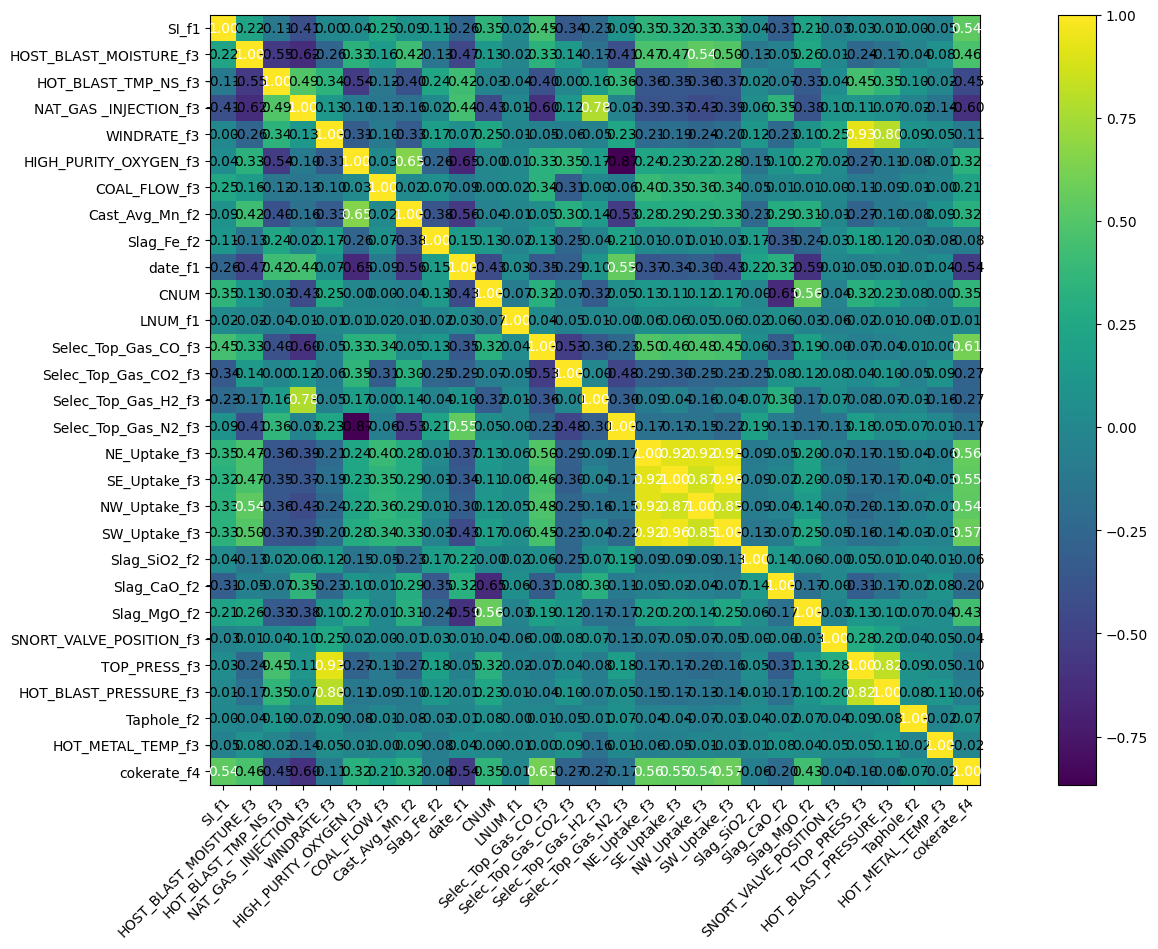

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''



'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.overwrite_with_sine_pattern(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

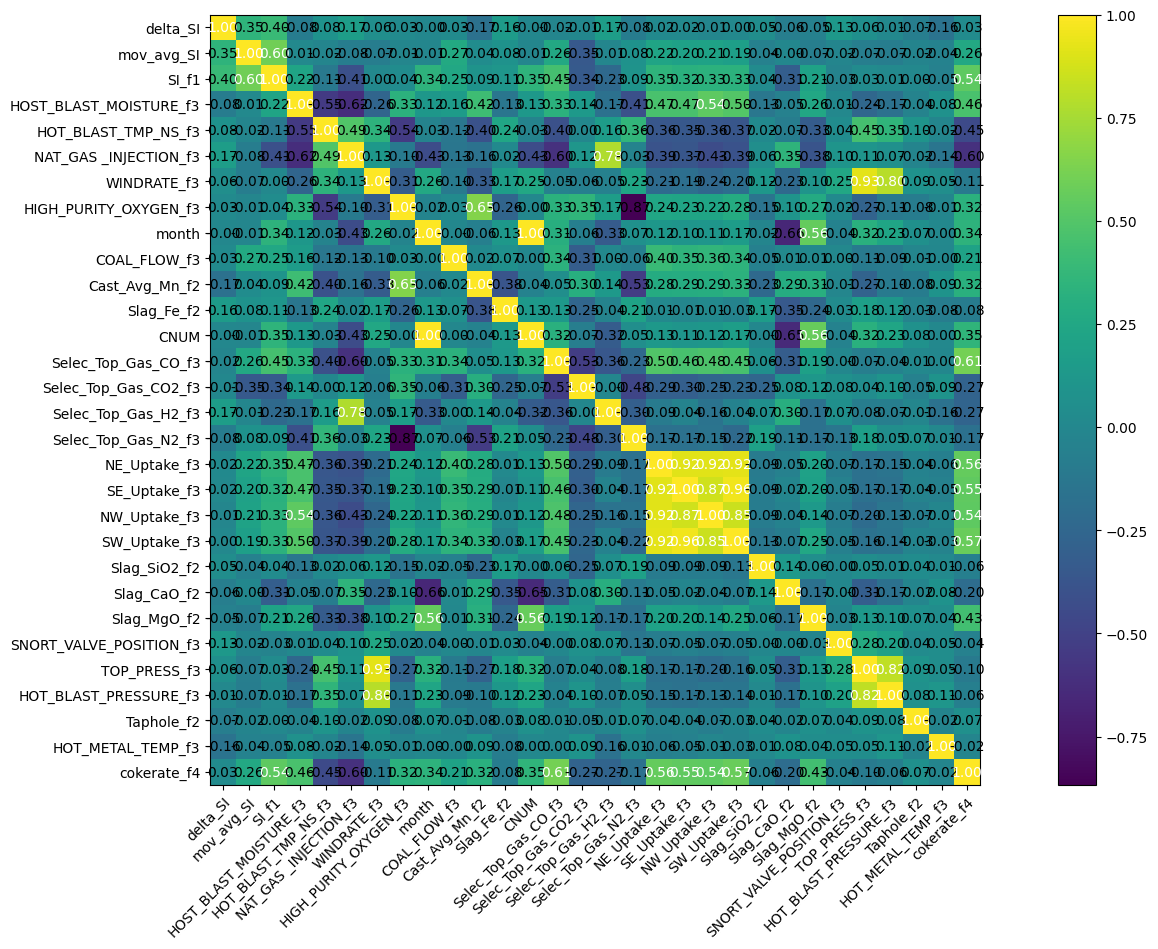

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def augment_xb(xb, std_factor=0.01, time_mask_prob=0.0, feature_mask_prob=0.0):
    # --- Add Gaussian noise ---
    std = xb.std(dim=(0, 1), keepdim=True) + 1e-6
    noise = torch.randn_like(xb) * std_factor * std
    xb = xb + noise

    # --- Optional: Time masking ---
    if time_mask_prob > 0.0:
        batch_size, seq_len, _ = xb.shape
        for i in range(batch_size):
            if torch.rand(1).item() < time_mask_prob:
                t = torch.randint(0, seq_len, (1,))
                xb[i, t] = 0.0  # or xb[i, t] = xb[i, max(t - 1, 0)]

    # --- Optional: Feature masking ---
    if feature_mask_prob > 0.0:
        _, _, feature_dim = xb.shape
        mask = torch.rand(feature_dim) < feature_mask_prob
        xb[..., mask] = 0.0

    return xb




In [20]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [21]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [22]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [23]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    model     = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()

    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    
 
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled                    = (train_CIVS_tr - x_means) / x_standard_devs
    
    torch.set_printoptions(sci_mode=False)
    
  

    model.train()
    
    pred_mean              = None  # will be initialized with first prediction
    schedule_smooth_factor = 0.9       # smoothing factor (you can tune this)
    
    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        
        xb, yb = tsGPT_obj.get_batch( train_CIVS_tr_scaled )  # shapes: [B, T, F]
        
       
    
            
        # === AUGMENT ONLY DURING TRAINING ===
        if model.training:
            xb = augment_xb(xb, std_factor=0.01, time_mask_prob=0.1, feature_mask_prob=0.1)

        
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  
        
        if pred_mean is None:
            pred_mean   = idx_pred.detach()
        else:
            # Exponential moving average update
            pred_mean   = schedule_smooth_factor * idx_pred.detach() + (1 - schedule_smooth_factor) * pred_mean
    
        B, T, E = xb.shape
        
        pred_si = pred_si.squeeze(2)
        
        
        
        ###################################################################################
        
        ## loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 10 of 10
        
        if batch_i < tsGPT_obj.max_iters*0.1:
            ## loss = criterion(pred, real)  # use true labels early
            loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb) 
        else:
            if batch_i % 2 == 0:
                loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)
            else:
                ## Option1: with mean
                ##loss_all    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , pred_mean)
                ## loss_all   = criterion(pred, pred_mean)  # self-target later
                
                # Or Option 2: Blended ground truth (replace above line with this)
                blend = max(0.0, 1.0 - batch_i / (tsGPT_obj.max_iters * 0.9))
                pred_target = blend * yb + (1 - blend) * idx_pred.detach()
                loss_all = criterion(idx_pred[:, -tsGPT_obj.block_size :, :], pred_target)

        
        y_si        =  yb[:, :, 2]     ## [B, 10, 1]
        
        ###################################################################################
        
        
        ## pred_si = pred_si[:, :3]
        ## y_si    =    y_si[:, :3]
        
        star         = 1.0
       
        loss_mse     = F.mse_loss(    pred_si, y_si)
        loss_cosh    = log_cosh_loss( pred_si, y_si)
        loss_SI_main = star * loss_mse + (1-star) * loss_cosh
        loss_SI      = loss_SI_main
        
        ###################################################################################
        
        alpha = 9.0
        
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_all 
        ## loss_total = (1 - alpha) * loss_all + alpha * criterion( idx_pred[:, 8:10], yb[:, 8:10] )
        
        main_loss       = criterion(idx_pred[:, 8:], yb[:, 8:])  # focus on final steps
        smoothness_loss = F.mse_loss(idx_pred[:, 0], idx_pred[:, -1])  # or across time steps
        loss_total      = main_loss + 0.01 * smoothness_loss

        
        ###################################################################################
        
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 200 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            ## print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [24]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [25]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.153815
Loss_SI: 1.2655954360961914 Loss_all: 1.1979341506958008
===


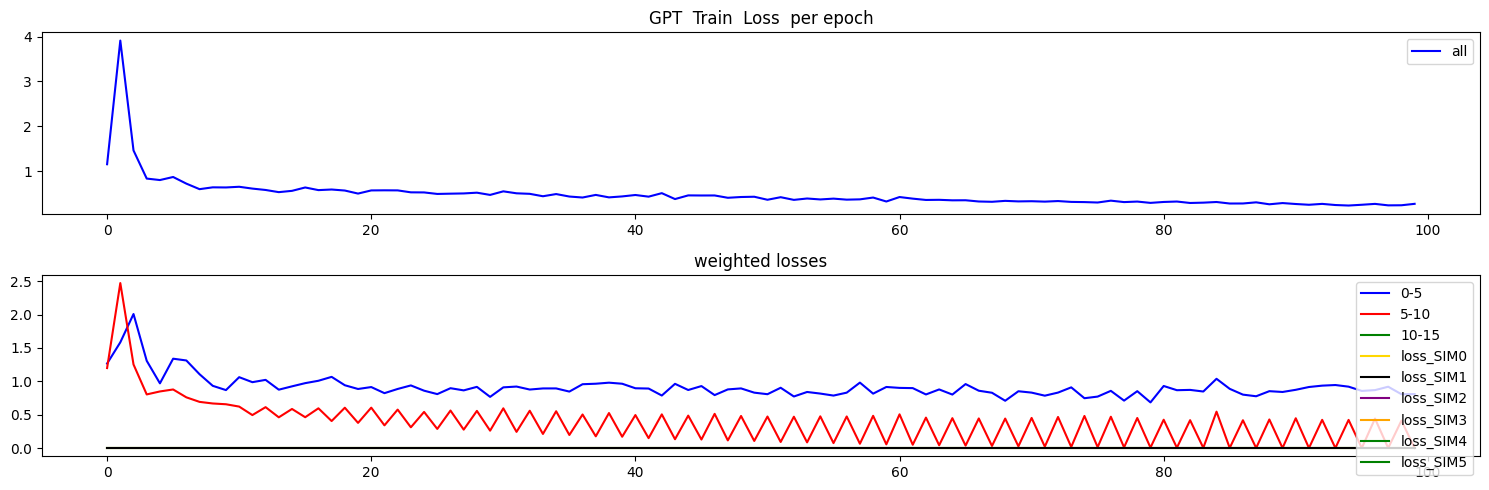

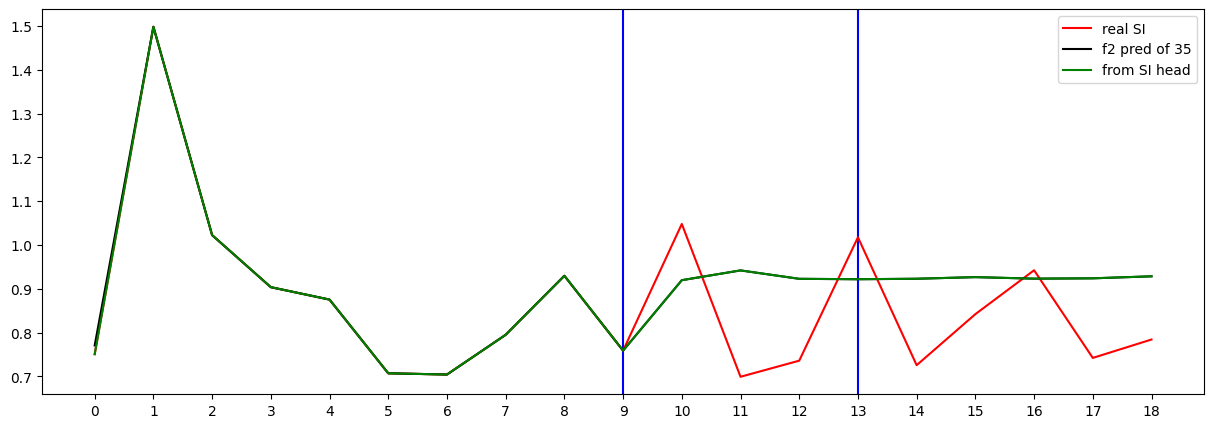

Testing R**2 - (all) - (no inputs):  0.9988175388340277
Testing R**2 - (f2) - SI full (no inputs):  -1.4127114371096376
Testing R**2 - SI head only (no inputs):  -1.4127114371096376
0 ...index R**2 (no inputs):  -0.1696874472656389
1 ...index R**2 (no inputs):  -0.30285920543377576
2 ...index R**2 (no inputs):  -1.4127114371096376
3 ...index R**2 (no inputs):  -3.562433323947828
4 ...index R**2 (no inputs):  -0.13646882878109468
5 ...index R**2 (no inputs):  -0.16110537742645237
6 ...index R**2 (no inputs):  -27.054681456224547
7 ...index R**2 (no inputs):  -76.79615919341737
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.05806540404170124
10 ...index R**2 (no inputs):  -0.21792262796014628
11 ...index R**2 (no inputs):  -3.9723148722646897
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.01155863656336531
16 ...index R**2 (no inputs):  -0.1322219763356578
17 ...index R**2 (no 

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.295413
Loss_SI: 1.2955944538116455 Loss_all: 1.2071605920791626
===


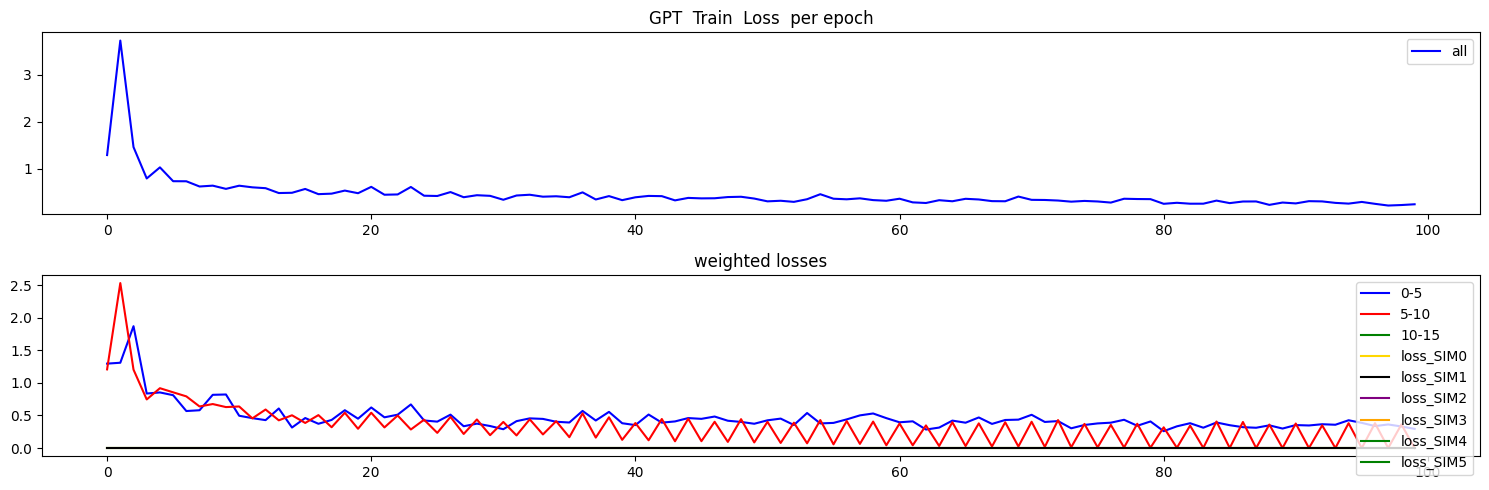

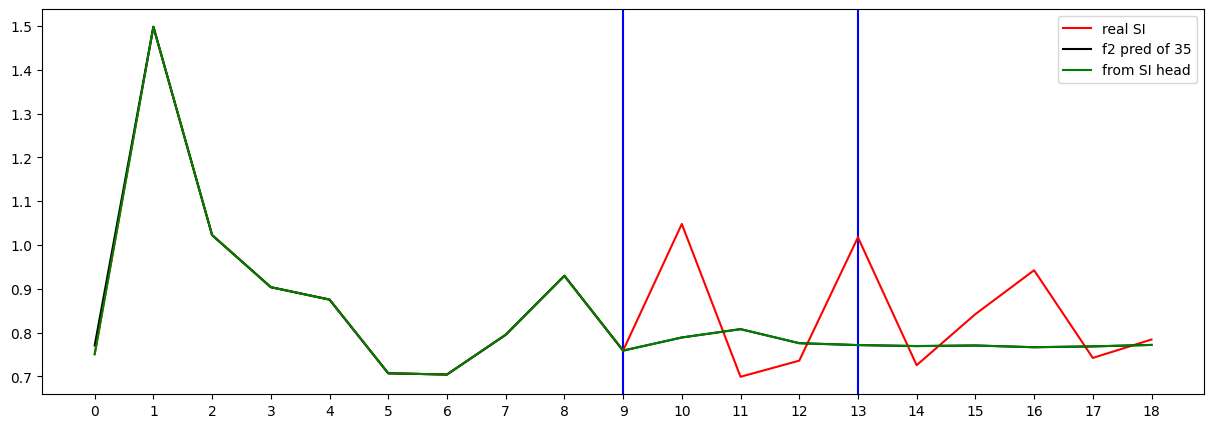

Testing R**2 - (all) - (no inputs):  0.9842362085023731
Testing R**2 - (f2) - SI full (no inputs):  -0.15627248172547614
Testing R**2 - SI head only (no inputs):  -0.15627248172547614
0 ...index R**2 (no inputs):  -0.11020572587887001
1 ...index R**2 (no inputs):  -0.24847454005426783
2 ...index R**2 (no inputs):  -0.15627248172547614
3 ...index R**2 (no inputs):  -147.29665784108764
4 ...index R**2 (no inputs):  -1.609831941390114
5 ...index R**2 (no inputs):  -14.706722194204463
6 ...index R**2 (no inputs):  -237.0480078813912
7 ...index R**2 (no inputs):  -540.1541602240925
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.42674544842499884
10 ...index R**2 (no inputs):  -0.38919938411714994
11 ...index R**2 (no inputs):  -287.5888051743889
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.005700718578570241
16 ...index R**2 (no inputs):  -0.028972273596033604
17 ...index R**2 (

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.499526
Loss_SI: 1.372788667678833 Loss_all: 1.4397482872009277
===


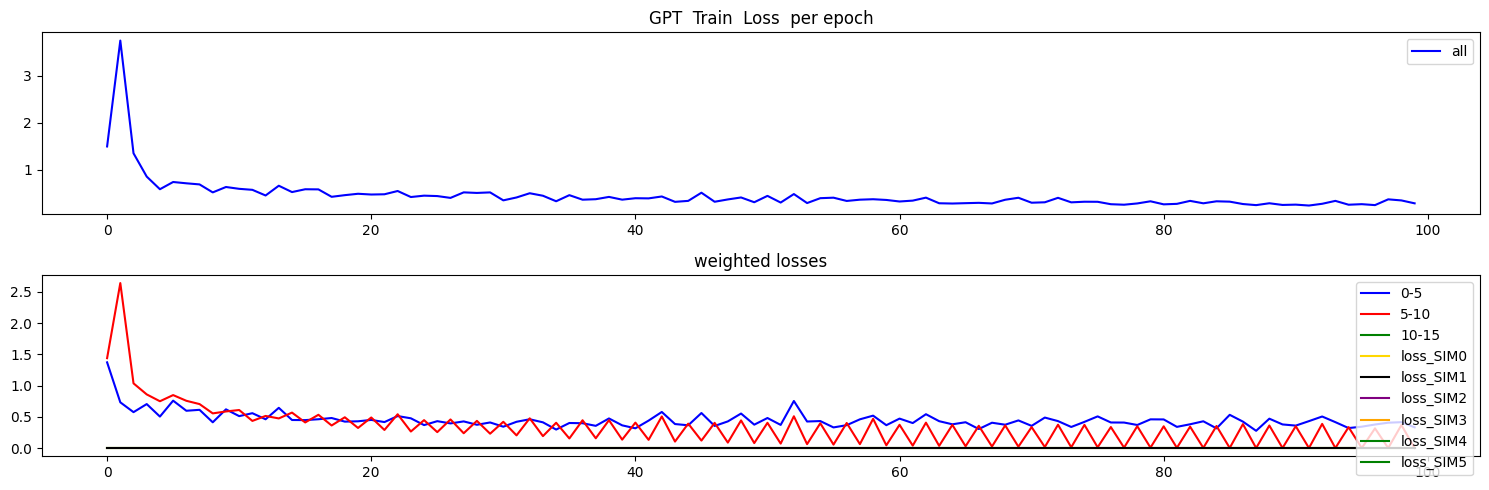

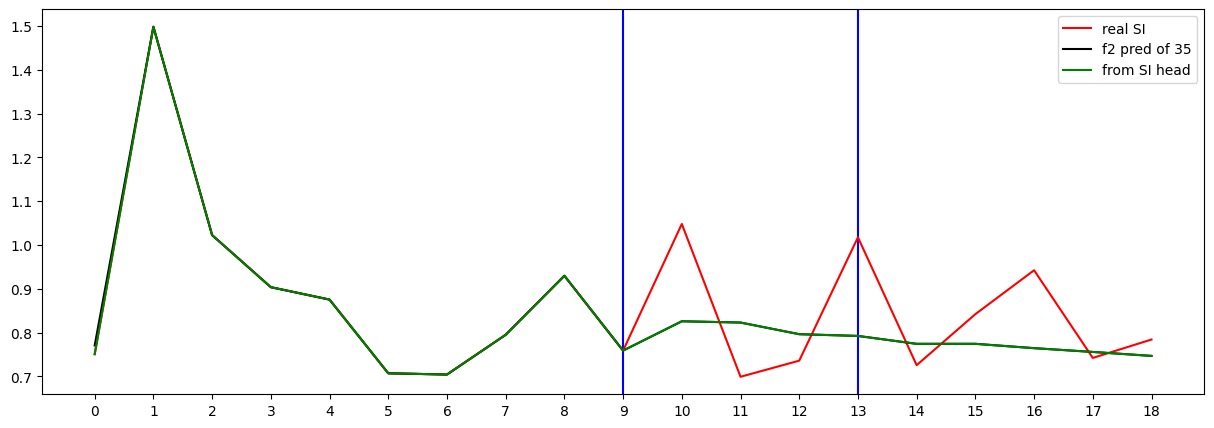

Testing R**2 - (all) - (no inputs):  0.9807317712647053
Testing R**2 - (f2) - SI full (no inputs):  -0.16958610929410733
Testing R**2 - SI head only (no inputs):  -0.16958610929410733
0 ...index R**2 (no inputs):  -0.20245879918604404
1 ...index R**2 (no inputs):  -0.062074435905507874
2 ...index R**2 (no inputs):  -0.16958610929410733
3 ...index R**2 (no inputs):  -278.3001238237095
4 ...index R**2 (no inputs):  -30.02763639511437
5 ...index R**2 (no inputs):  -16.97682324506804
6 ...index R**2 (no inputs):  -86.91341915883314
7 ...index R**2 (no inputs):  -18929.051735893256
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.9215626905812389
10 ...index R**2 (no inputs):  -0.11724875058993156
11 ...index R**2 (no inputs):  -218.9028465539941
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.17786719515410376
16 ...index R**2 (no inputs):  0.061937485931098823
17 ...index R**2 (no 

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.532303
Loss_SI: 1.0753146409988403 Loss_all: 1.3066903352737427
===


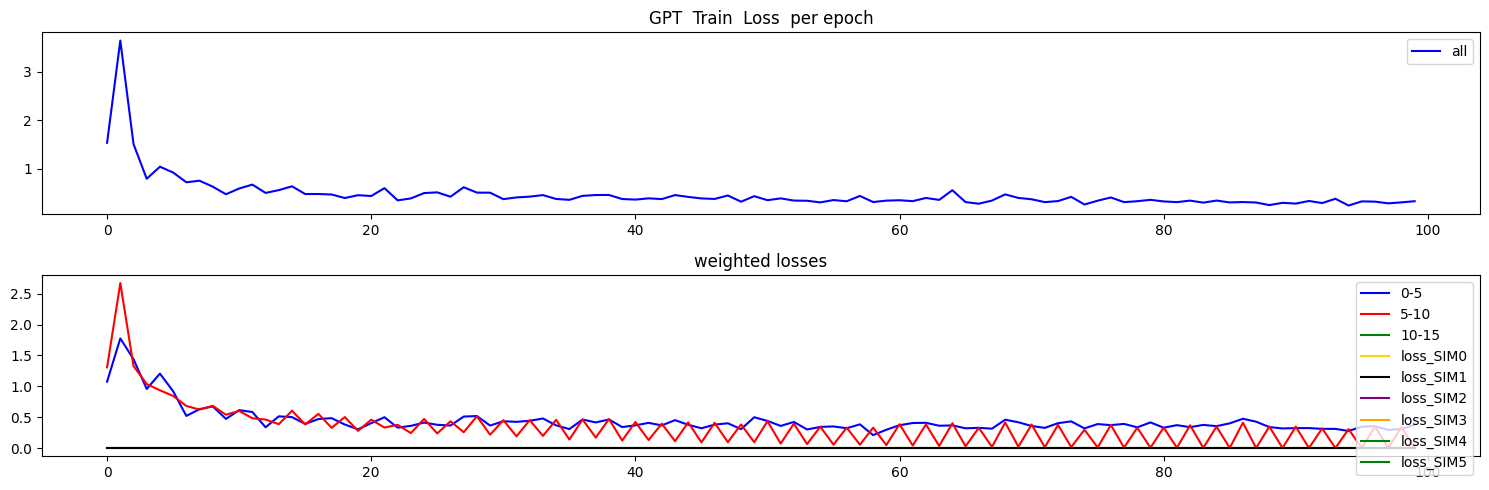

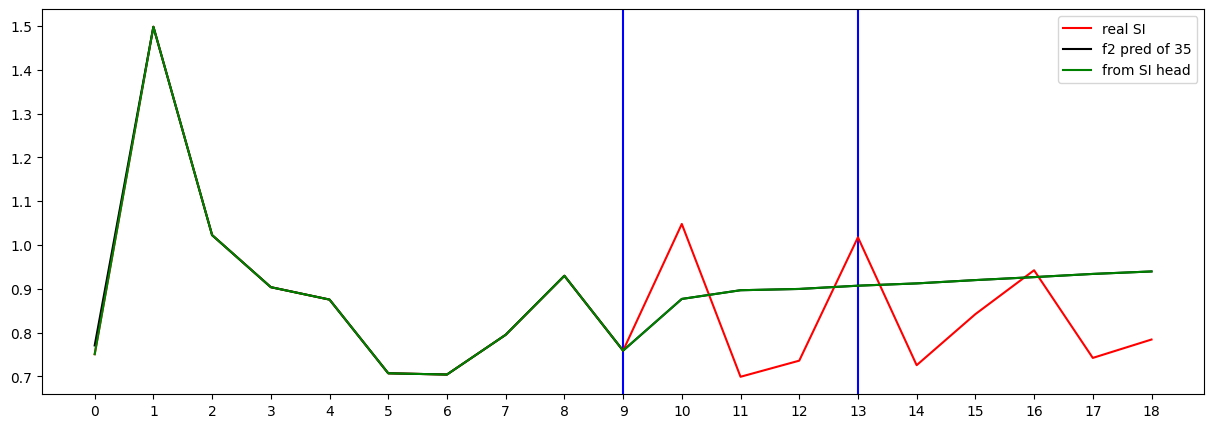

Testing R**2 - (all) - (no inputs):  0.9968603599568784
Testing R**2 - (f2) - SI full (no inputs):  -1.124457813330309
Testing R**2 - SI head only (no inputs):  -1.124457813330309
0 ...index R**2 (no inputs):  -0.2013945694670891
1 ...index R**2 (no inputs):  0.032241979533761844
2 ...index R**2 (no inputs):  -1.124457813330309
3 ...index R**2 (no inputs):  -122.164918844294
4 ...index R**2 (no inputs):  -0.11452559303109289
5 ...index R**2 (no inputs):  -1.6520749239029802
6 ...index R**2 (no inputs):  -232.85628839165895
7 ...index R**2 (no inputs):  -23635.135941932804
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.322535021737103
10 ...index R**2 (no inputs):  -0.027001820856697778
11 ...index R**2 (no inputs):  -25.538112859027002
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7691434041152445
16 ...index R**2 (no inputs):  -0.08600669120092896
17 ...index R**2 (no input

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [30]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.281334
Loss_SI: 1.3090509176254272 Loss_all: 1.234724760055542
===


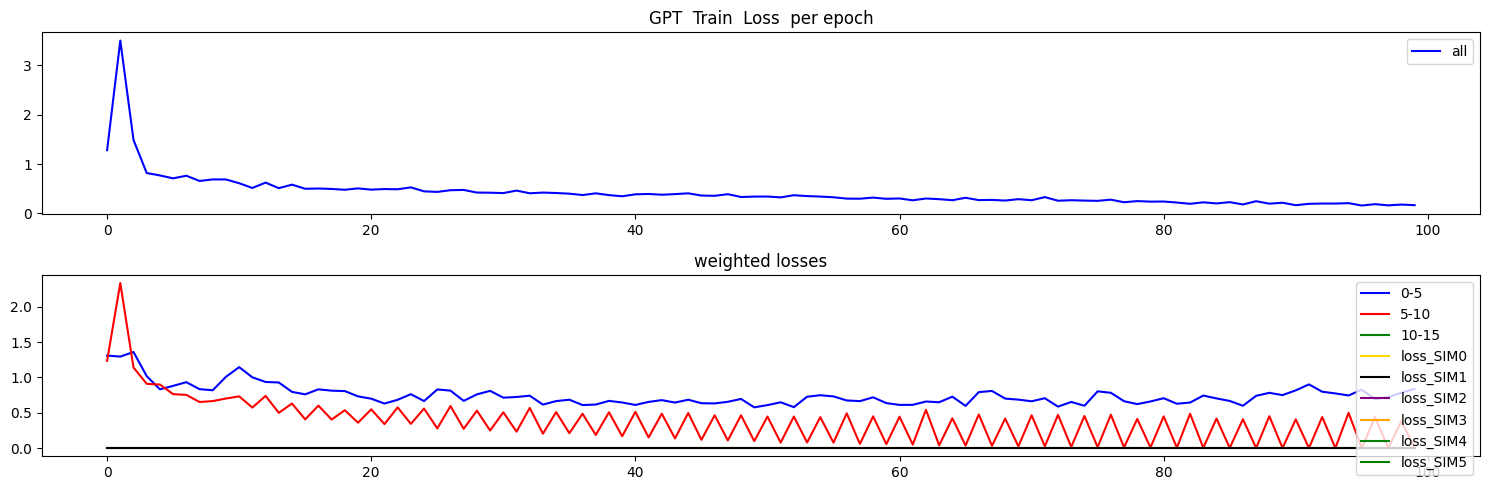

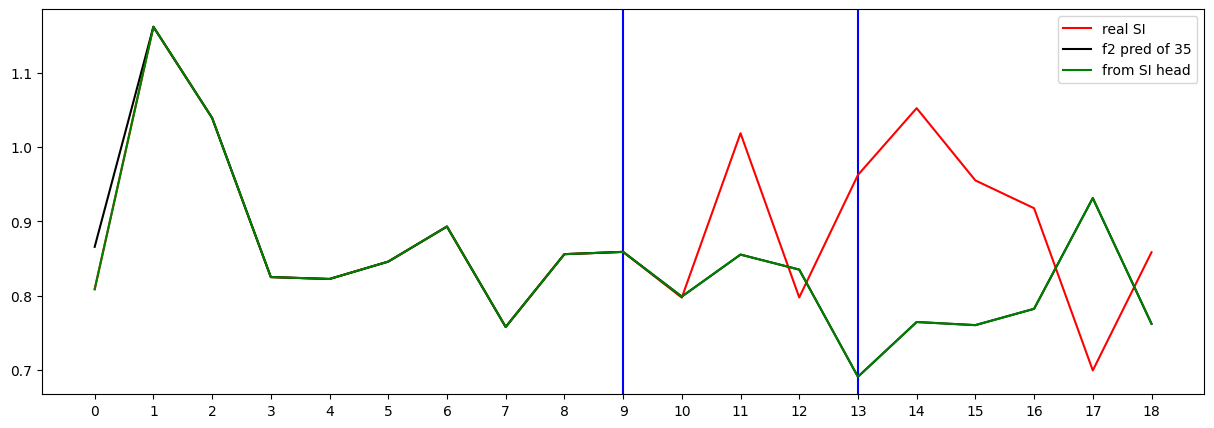

Testing R**2 - (all) - (no inputs):  0.9898158529662994
Testing R**2 - (f2) - SI full (no inputs):  -1.6035262742721295
Testing R**2 - SI head only (no inputs):  -1.6035262742721295
0 ...index R**2 (no inputs):  -0.6121996742315228
1 ...index R**2 (no inputs):  -1.8512317023810567
2 ...index R**2 (no inputs):  -1.6035262742721295
3 ...index R**2 (no inputs):  -1.1464571555912704
4 ...index R**2 (no inputs):  -0.04290297303195656
5 ...index R**2 (no inputs):  -0.7726122981836652
6 ...index R**2 (no inputs):  -0.6449075140405691
7 ...index R**2 (no inputs):  -0.8602350223012363
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.11359245842012311
10 ...index R**2 (no inputs):  -0.15602063731939508
11 ...index R**2 (no inputs):  -16.329845302467316
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.097178463551821
16 ...index R**2 (no inputs):  -4.451546991316401
17 ...index R**2 (no inp

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 1.505033
Loss_SI: 1.7556167840957642 Loss_all: 1.471838355064392
===


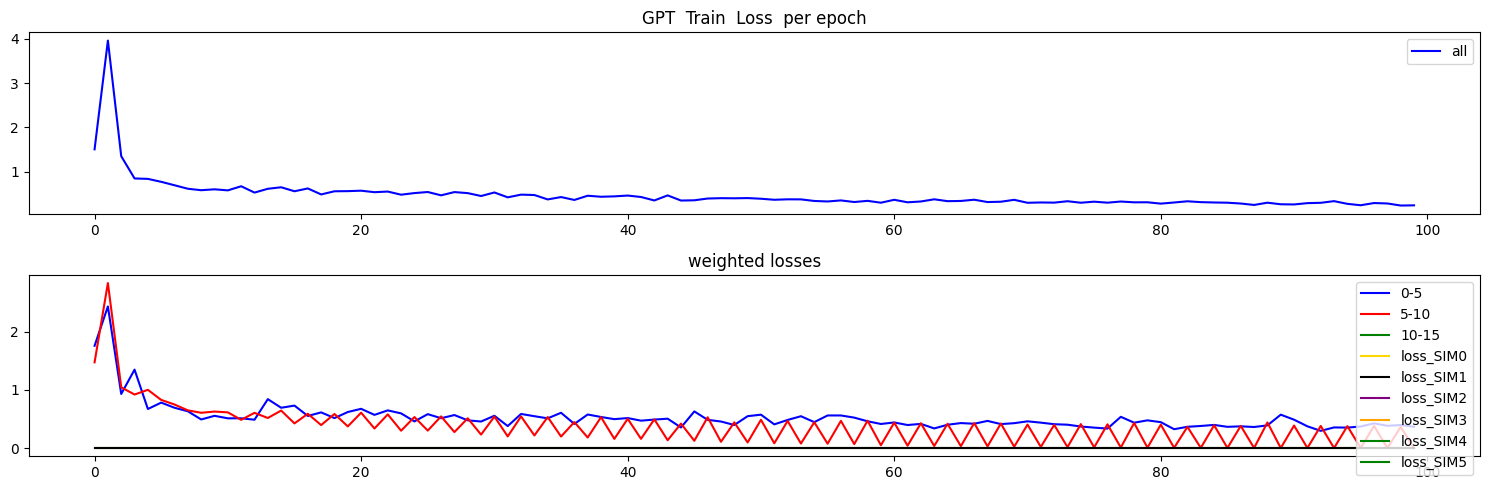

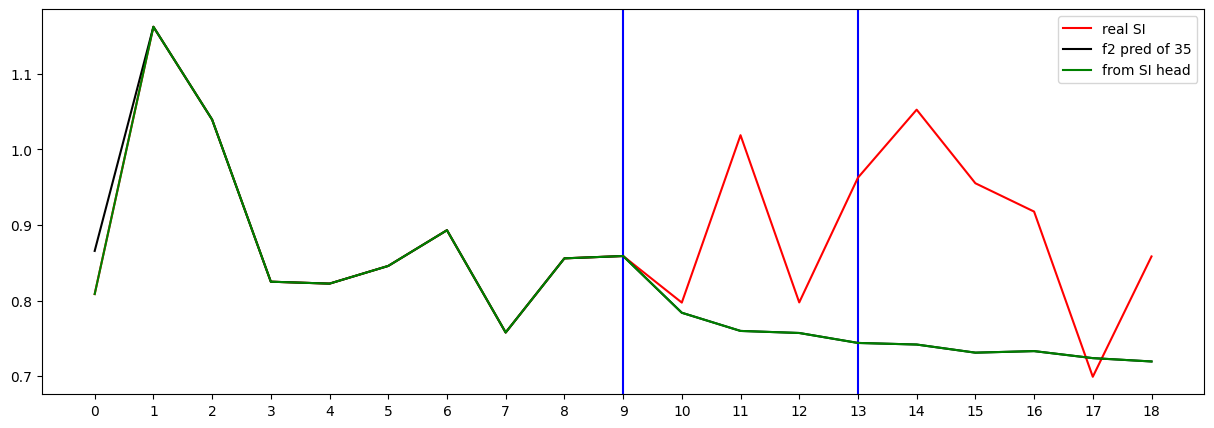

Testing R**2 - (all) - (no inputs):  0.9949157051070764
Testing R**2 - (f2) - SI full (no inputs):  -1.8597283089716052
Testing R**2 - SI head only (no inputs):  -1.8597283089716052
0 ...index R**2 (no inputs):  -0.13757456689286895
1 ...index R**2 (no inputs):  -0.9064746992620871
2 ...index R**2 (no inputs):  -1.8597283089716052
3 ...index R**2 (no inputs):  0.30265702831257457
4 ...index R**2 (no inputs):  -12.689264336986005
5 ...index R**2 (no inputs):  0.12169693133063353
6 ...index R**2 (no inputs):  -0.2548611075306819
7 ...index R**2 (no inputs):  0.023184921495890132
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.001890661242188063
10 ...index R**2 (no inputs):  -0.03668625494747446
11 ...index R**2 (no inputs):  -79.85608392032461
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7383276072960512
16 ...index R**2 (no inputs):  -2.1771999701683726
17 ...index R**2 (no 

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.149875
Loss_SI: 1.214511513710022 Loss_all: 1.1698613166809082
===


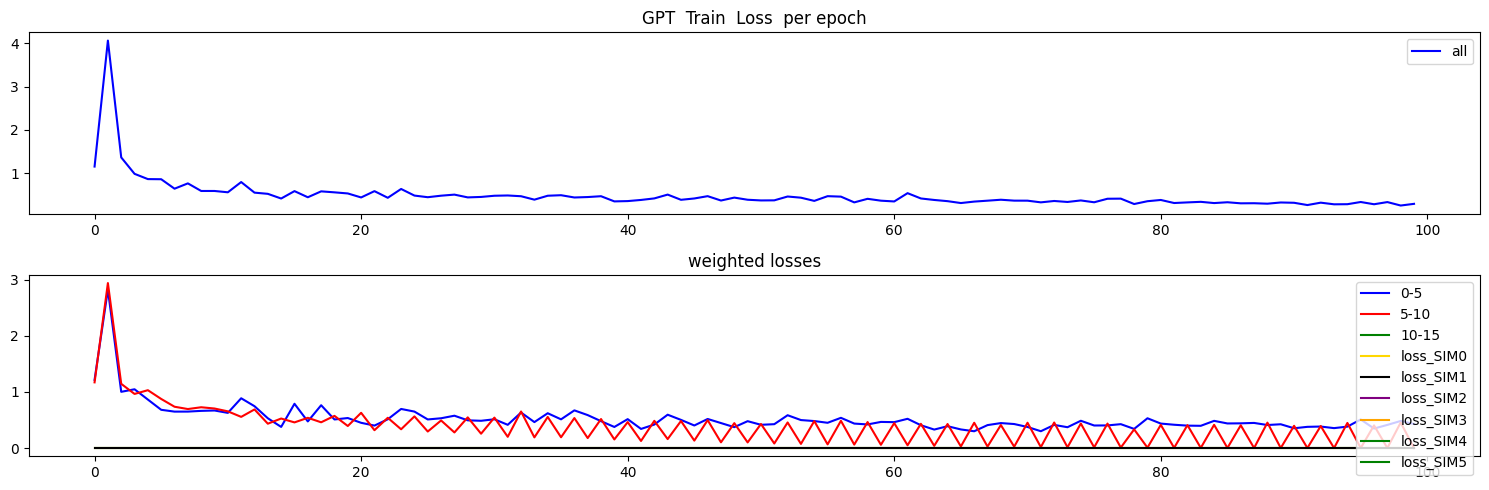

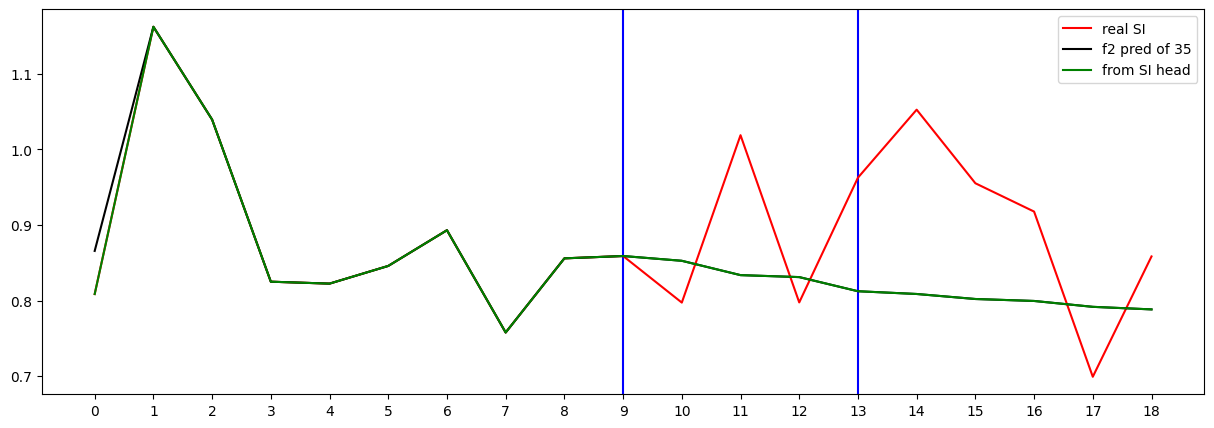

Testing R**2 - (all) - (no inputs):  0.9954761991434703
Testing R**2 - (f2) - SI full (no inputs):  -0.45701573845246957
Testing R**2 - SI head only (no inputs):  -0.45701573845246957
0 ...index R**2 (no inputs):  -0.04345829395231382
1 ...index R**2 (no inputs):  -0.7719109627425929
2 ...index R**2 (no inputs):  -0.45701573845246957
3 ...index R**2 (no inputs):  -0.47990492168829024
4 ...index R**2 (no inputs):  -7.917287369963711
5 ...index R**2 (no inputs):  0.2210490108116182
6 ...index R**2 (no inputs):  -0.34858954168977374
7 ...index R**2 (no inputs):  0.08788413333718648
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.03367256843834476
10 ...index R**2 (no inputs):  -0.0110214307452694
11 ...index R**2 (no inputs):  -266.3923951120773
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.3371260222741894
16 ...index R**2 (no inputs):  -3.9383316080014605
17 ...index R**2 (no 

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.975561
Loss_SI: 0.7991811037063599 Loss_all: 1.0909502506256104
===


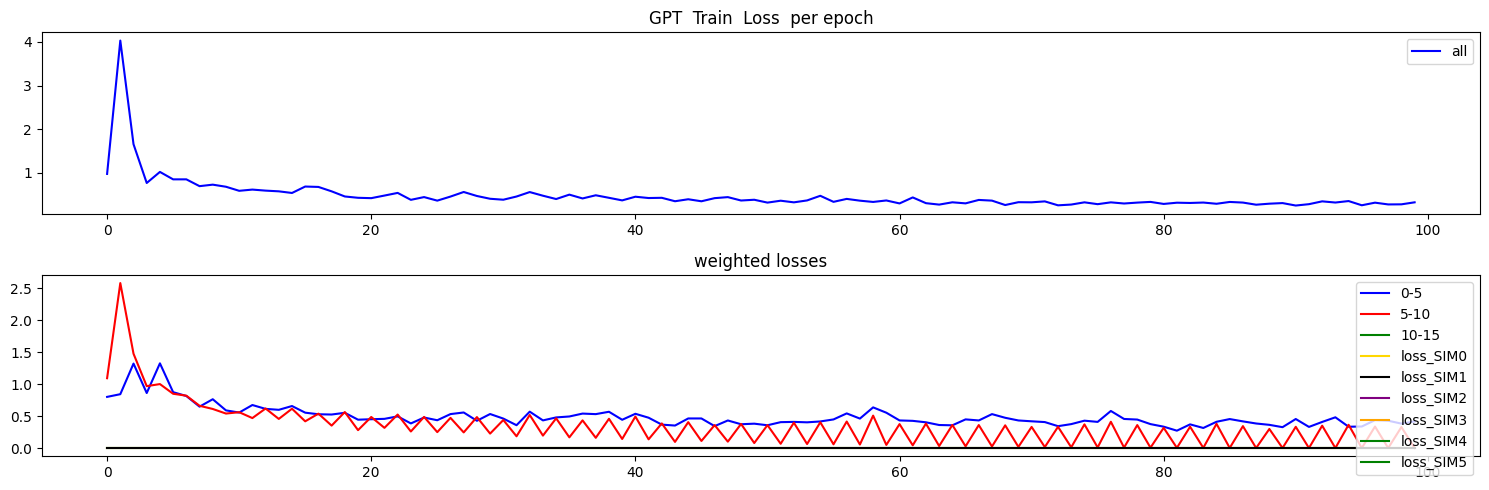

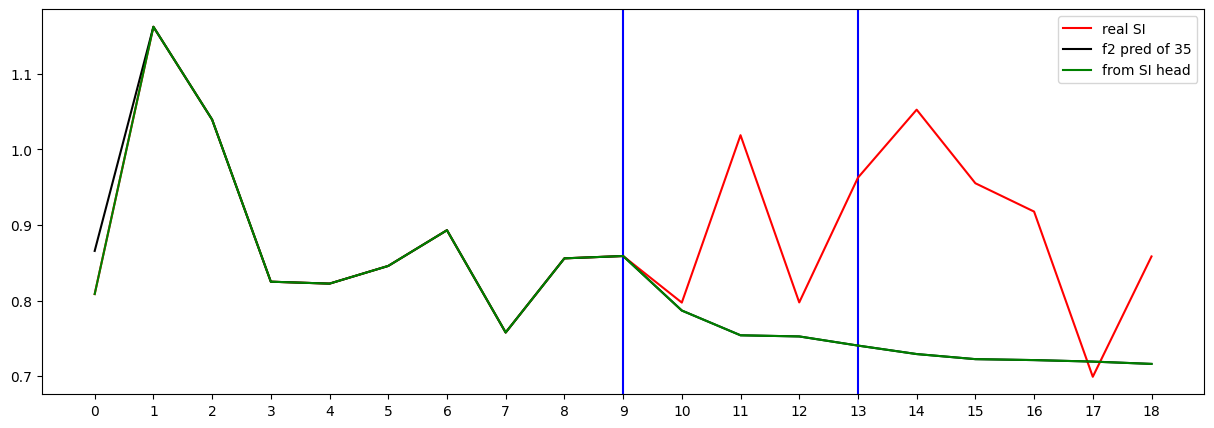

Testing R**2 - (all) - (no inputs):  0.9961461500687827
Testing R**2 - (f2) - SI full (no inputs):  -1.9843540211678943
Testing R**2 - SI head only (no inputs):  -1.9843540211678943
0 ...index R**2 (no inputs):  -0.09946610734727002
1 ...index R**2 (no inputs):  -2.088467696708859
2 ...index R**2 (no inputs):  -1.9843540211678943
3 ...index R**2 (no inputs):  -0.9712228732772916
4 ...index R**2 (no inputs):  -8.272973443482394
5 ...index R**2 (no inputs):  0.336864938594
6 ...index R**2 (no inputs):  -0.5658290604753877
7 ...index R**2 (no inputs):  0.32682613748843725
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.09913182270413179
10 ...index R**2 (no inputs):  0.022461892980517817
11 ...index R**2 (no inputs):  -199.17022932880215
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9365371155800171
16 ...index R**2 (no inputs):  -2.6992715227591275
17 ...index R**2 (no inputs):

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [35]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.219561
Loss_SI: 1.4123945236206055 Loss_all: 1.1379843950271606
===


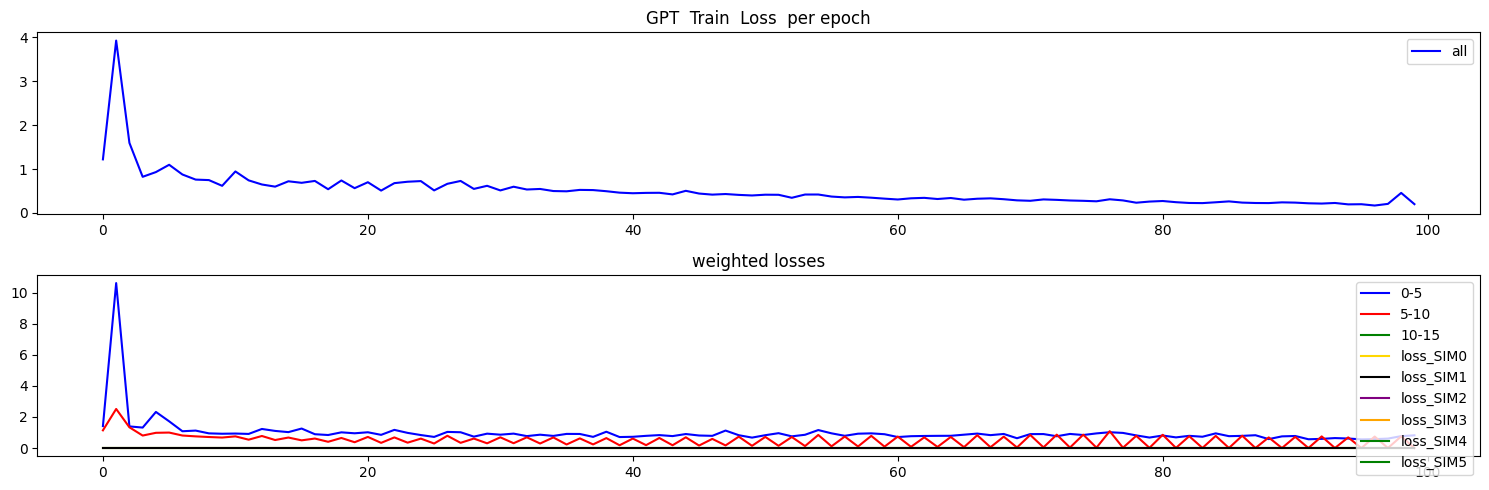

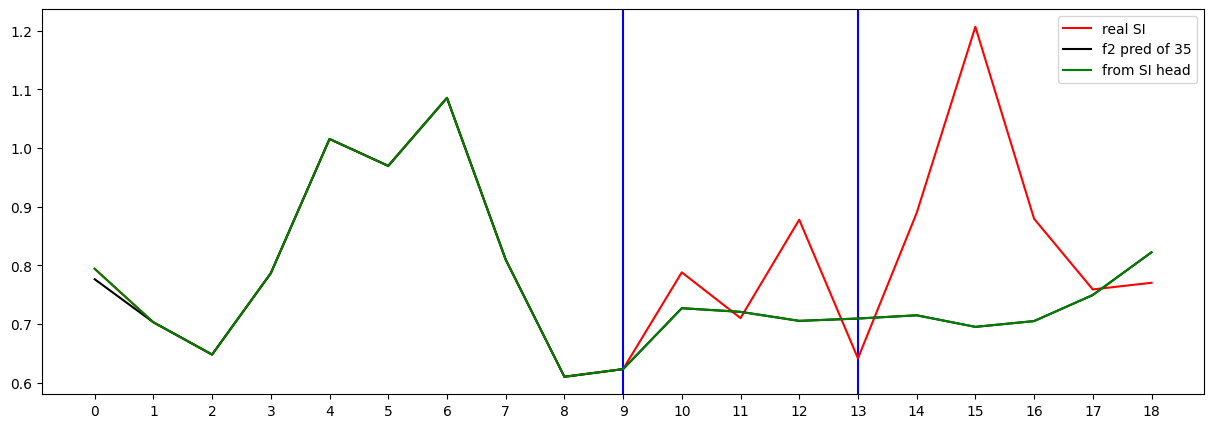

Testing R**2 - (all) - (no inputs):  0.9858139316873442
Testing R**2 - (f2) - SI full (no inputs):  -0.6289938840165255
Testing R**2 - SI head only (no inputs):  -0.6289938840165255
0 ...index R**2 (no inputs):  -0.0017452137572453452
1 ...index R**2 (no inputs):  -1.0073249118512733
2 ...index R**2 (no inputs):  -0.6289938840165255
3 ...index R**2 (no inputs):  -3.7291562872729305
4 ...index R**2 (no inputs):  -31.644922406254764
5 ...index R**2 (no inputs):  -2.7064524738967233
6 ...index R**2 (no inputs):  -90.06729852820304
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1003181139726983
10 ...index R**2 (no inputs):  0.0569404939736623
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.7250818803391761
16 ...index R**2 (no inputs):  -1.476537898462278
17 ...index R**2 (no inputs):  -157.00871143634996
18 ...

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.015260
Loss_SI: 1.018187165260315 Loss_all: 1.0543605089187622
===


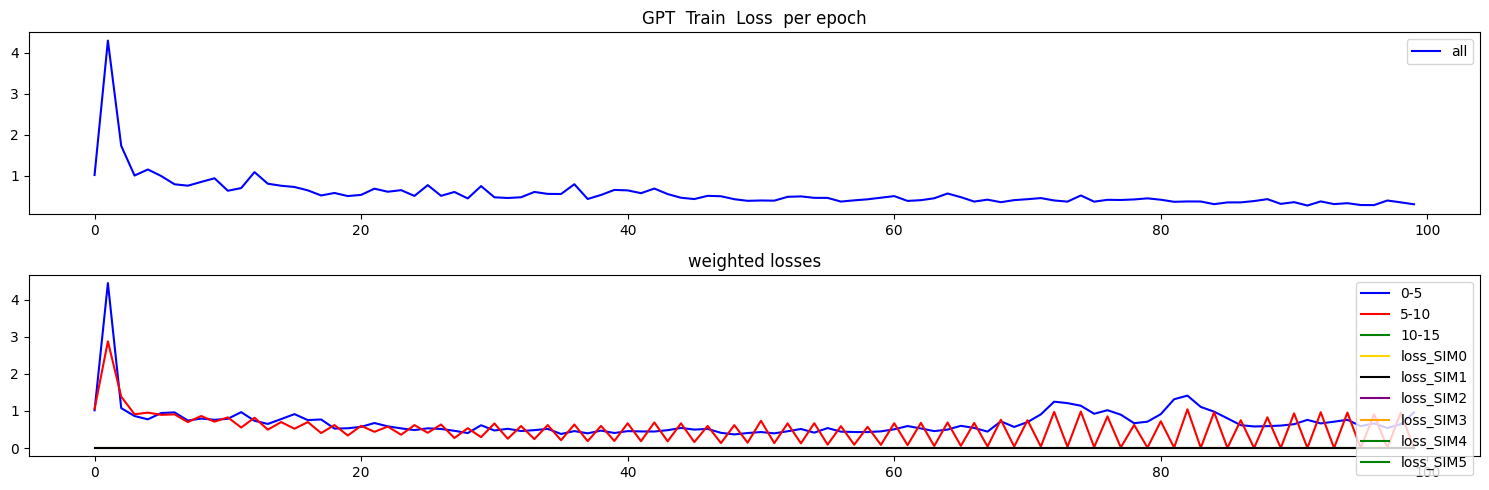

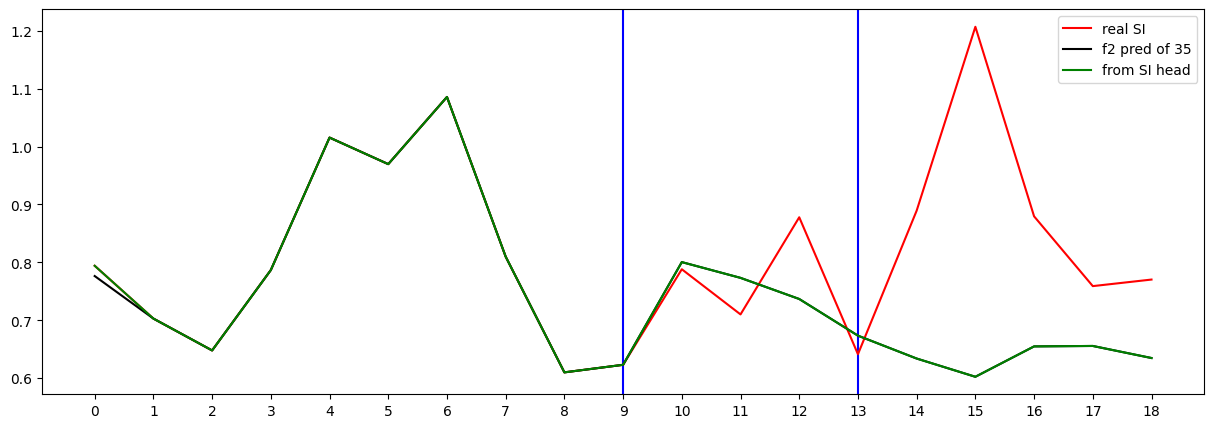

Testing R**2 - (all) - (no inputs):  0.97533876227148
Testing R**2 - (f2) - SI full (no inputs):  -1.523379123593526
Testing R**2 - SI head only (no inputs):  -1.523379123593526
0 ...index R**2 (no inputs):  -0.04824104599377166
1 ...index R**2 (no inputs):  -3.0618106165008134
2 ...index R**2 (no inputs):  -1.523379123593526
3 ...index R**2 (no inputs):  -3.305993255303865
4 ...index R**2 (no inputs):  -381.57761200764014
5 ...index R**2 (no inputs):  -5.447503208844666
6 ...index R**2 (no inputs):  -3235.00558944611
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.007584556064434755
10 ...index R**2 (no inputs):  -0.05976579726585052
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -5.458584588443362
16 ...index R**2 (no inputs):  -0.15286642189672306
17 ...index R**2 (no inputs):  -10.314649729814455
18 ...index 

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.207150
Loss_SI: 1.3972561359405518 Loss_all: 1.2316746711730957
===


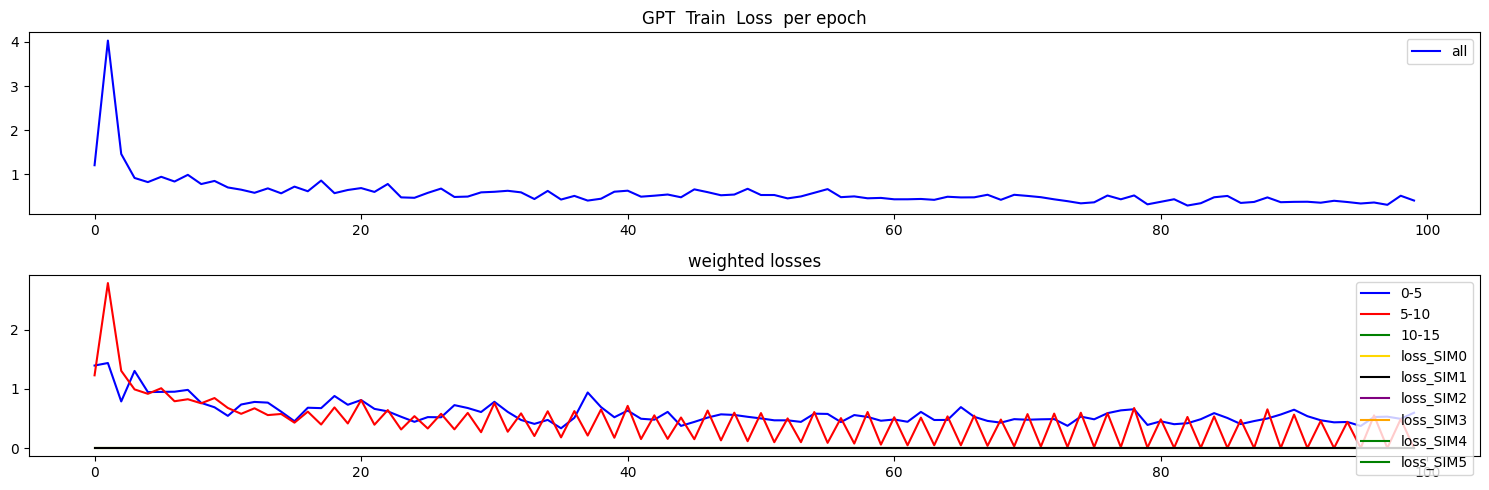

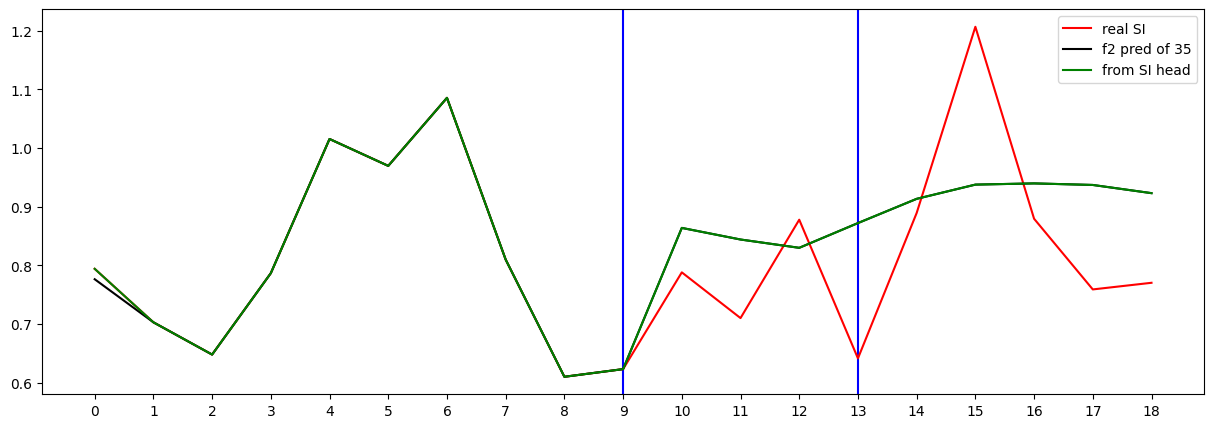

Testing R**2 - (all) - (no inputs):  0.973756081422067
Testing R**2 - (f2) - SI full (no inputs):  -0.0835317160973621
Testing R**2 - SI head only (no inputs):  -0.0835317160973621
0 ...index R**2 (no inputs):  -0.07982967144479414
1 ...index R**2 (no inputs):  -0.4781440188630821
2 ...index R**2 (no inputs):  -0.0835317160973621
3 ...index R**2 (no inputs):  0.0065264928717657655
4 ...index R**2 (no inputs):  -1225.199713578613
5 ...index R**2 (no inputs):  -5.845514968346744
6 ...index R**2 (no inputs):  -19243.378855605424
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.32002162013611857
10 ...index R**2 (no inputs):  0.060352157344400026
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.969270743671535
16 ...index R**2 (no inputs):  -0.7896596944929939
17 ...index R**2 (no inputs):  -550.7138739036849
18 ...

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.084331
Loss_SI: 1.3214672803878784 Loss_all: 1.1871365308761597
===


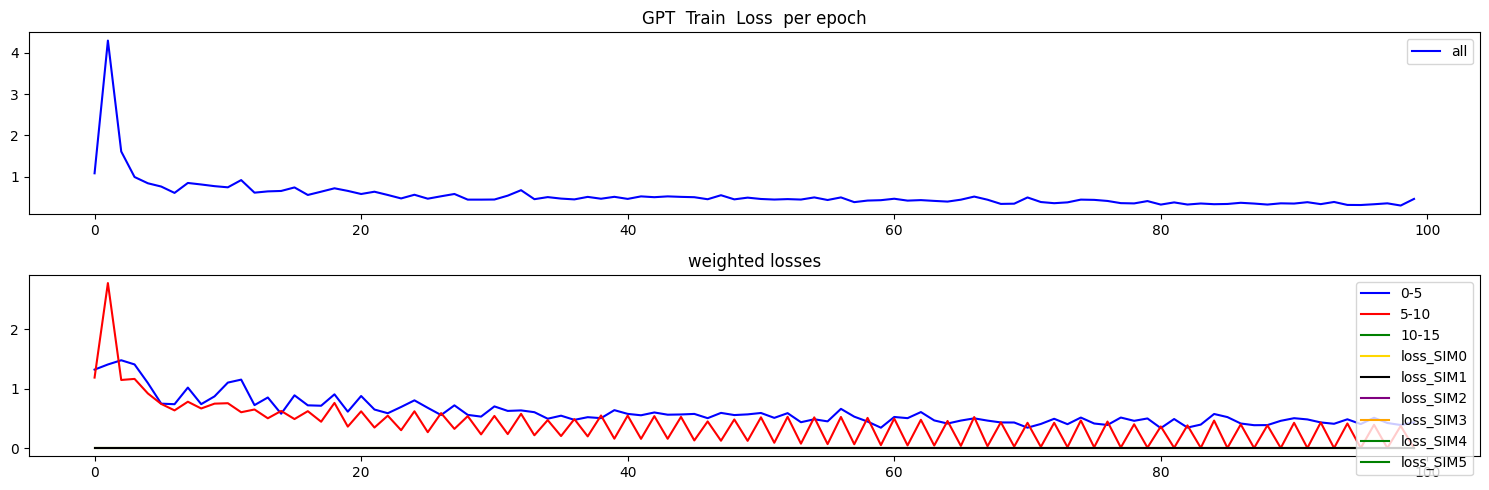

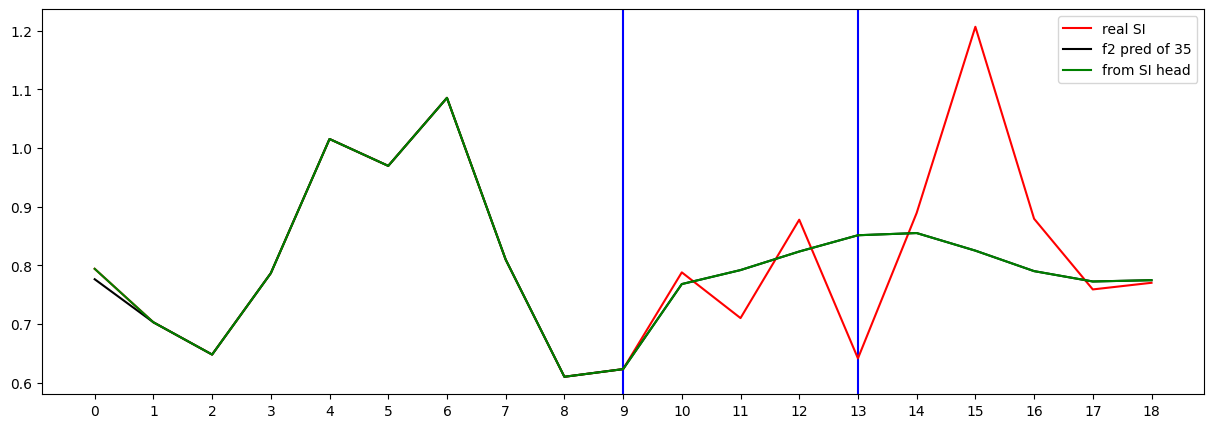

Testing R**2 - (all) - (no inputs):  0.9634113734055401
Testing R**2 - (f2) - SI full (no inputs):  0.17312635152187206
Testing R**2 - SI head only (no inputs):  0.17312635152187206
0 ...index R**2 (no inputs):  -0.025420808070647727
1 ...index R**2 (no inputs):  -0.12361270013509729
2 ...index R**2 (no inputs):  0.17312635152187206
3 ...index R**2 (no inputs):  -2.171747504736587
4 ...index R**2 (no inputs):  -2.8233469268904514
5 ...index R**2 (no inputs):  -8.558057643085796
6 ...index R**2 (no inputs):  -1670.9515238213503
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.019238106170361924
10 ...index R**2 (no inputs):  0.3193652465699356
11 ...index R**2 (no inputs):  0.0
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.8342373768339915
16 ...index R**2 (no inputs):  -4.1372764275855864
17 ...index R**2 (no inputs):  -565.0460593988007
18 ..

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [40]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.022047
Loss_SI: 1.316837191581726 Loss_all: 1.2234888076782227
===


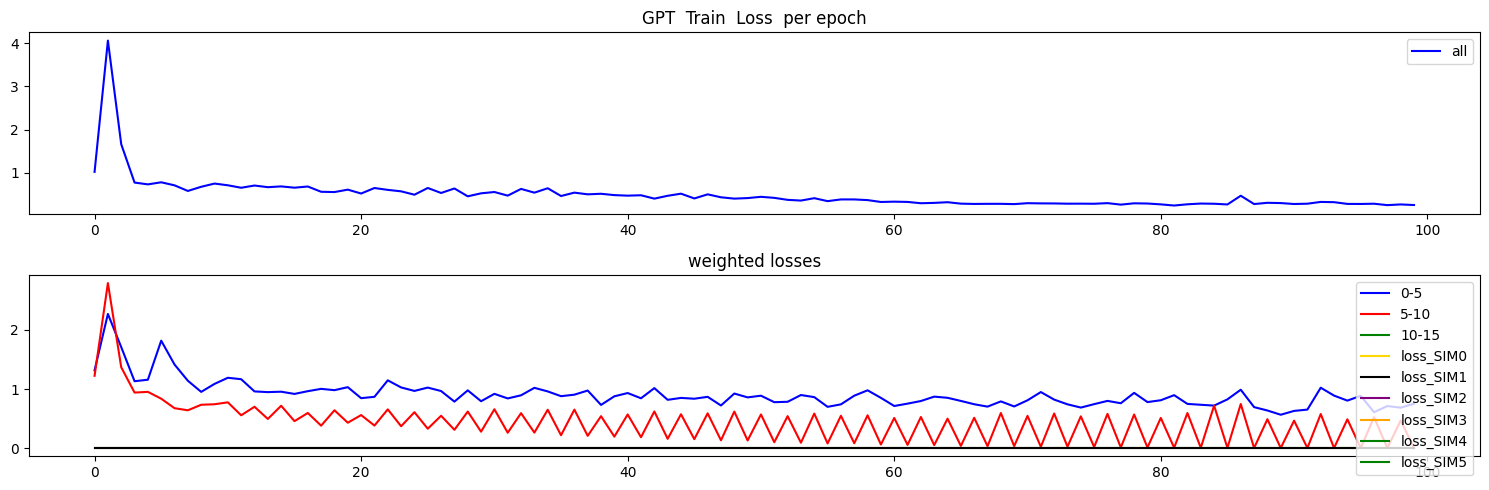

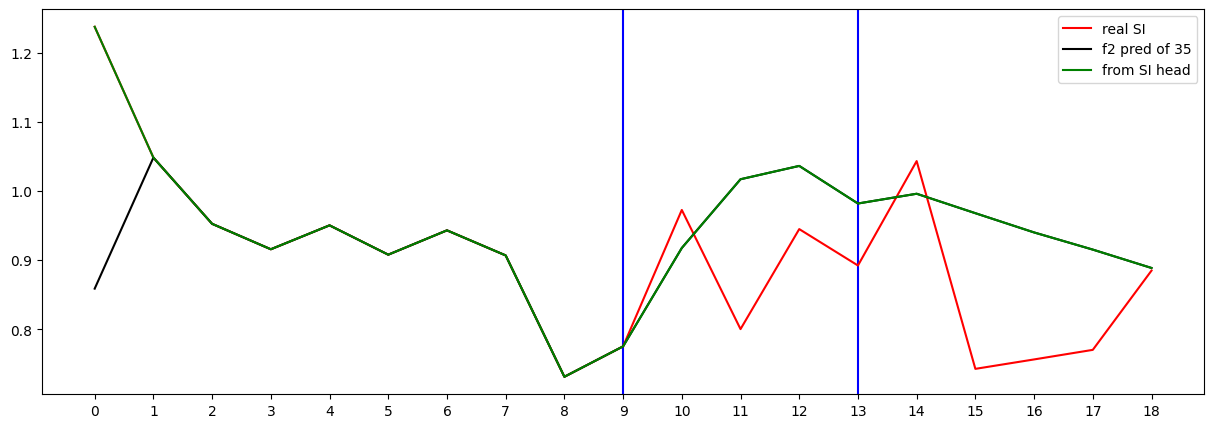

Testing R**2 - (all) - (no inputs):  0.9943873936755481
Testing R**2 - (f2) - SI full (no inputs):  -0.45505159146471175
Testing R**2 - SI head only (no inputs):  -0.45505159146471175
0 ...index R**2 (no inputs):  -0.13743991663620503
1 ...index R**2 (no inputs):  -0.00630032203051778
2 ...index R**2 (no inputs):  -0.45505159146471175
3 ...index R**2 (no inputs):  -0.22314696497545672
4 ...index R**2 (no inputs):  -0.08484798178082675
5 ...index R**2 (no inputs):  -0.14220235475750242
6 ...index R**2 (no inputs):  0.04136549120765276
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -2.7707816897498594
10 ...index R**2 (no inputs):  -0.38167658811309435
11 ...index R**2 (no inputs):  -0.2777416909452948
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.16919544803332998
16 ...index R**2 (no inputs):  -0.1983336110344356
17 ...index R**2 (no inputs):  

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 1.355152
Loss_SI: 1.6591835021972656 Loss_all: 1.3737969398498535
===


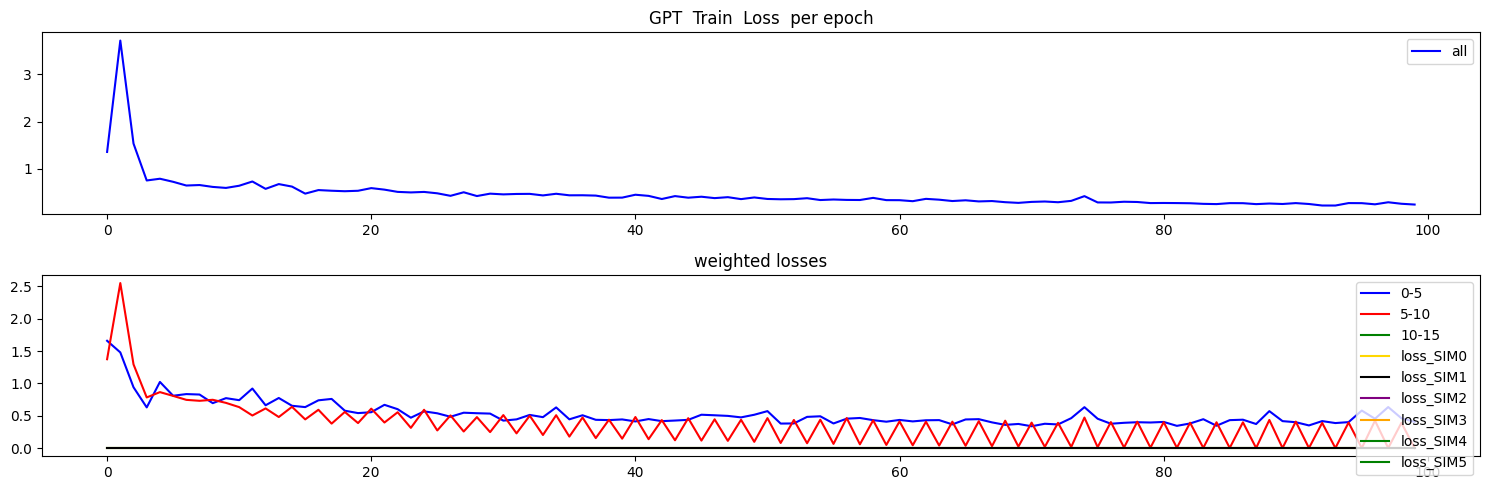

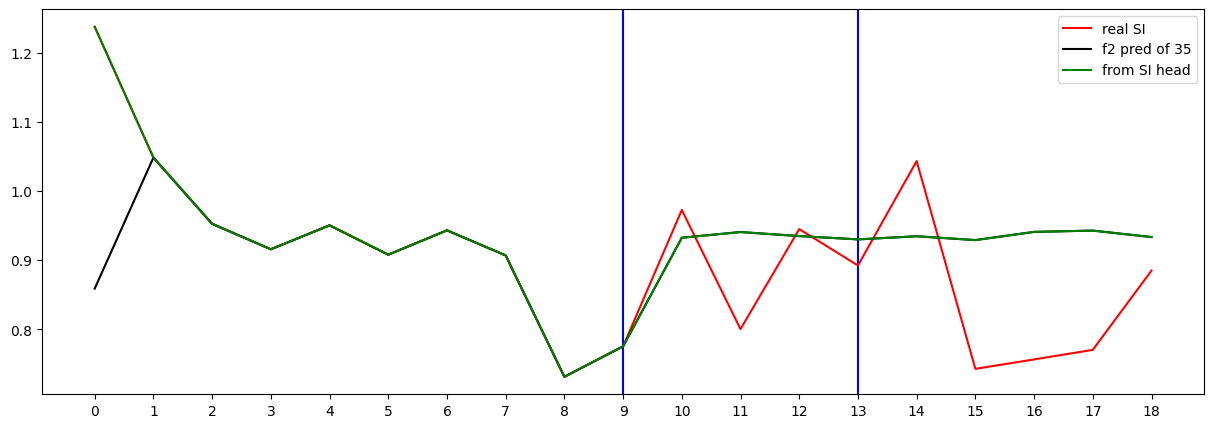

Testing R**2 - (all) - (no inputs):  0.9947328996131124
Testing R**2 - (f2) - SI full (no inputs):  -0.07113697951674114
Testing R**2 - SI head only (no inputs):  -0.07113697951674114
0 ...index R**2 (no inputs):  -0.10315237450089687
1 ...index R**2 (no inputs):  0.12484636186526243
2 ...index R**2 (no inputs):  -0.07113697951674114
3 ...index R**2 (no inputs):  -0.771359658040937
4 ...index R**2 (no inputs):  -9.137461192007395
5 ...index R**2 (no inputs):  -0.05278494173941417
6 ...index R**2 (no inputs):  -0.9771158295961897
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.1293121664254167
10 ...index R**2 (no inputs):  -1.290054030470536
11 ...index R**2 (no inputs):  -15.441818124679003
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.6888519900746255
16 ...index R**2 (no inputs):  -1.073272010963687
17 ...index R**2 (no inputs):  -61.10434

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 1.359192
Loss_SI: 1.0898317098617554 Loss_all: 1.2852076292037964
===


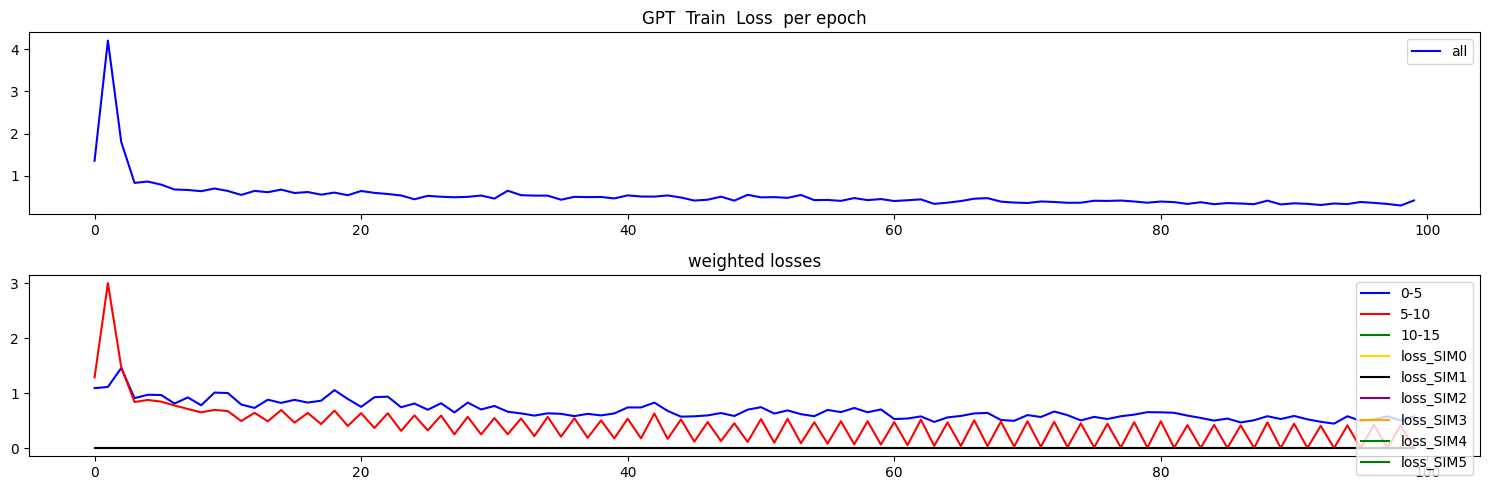

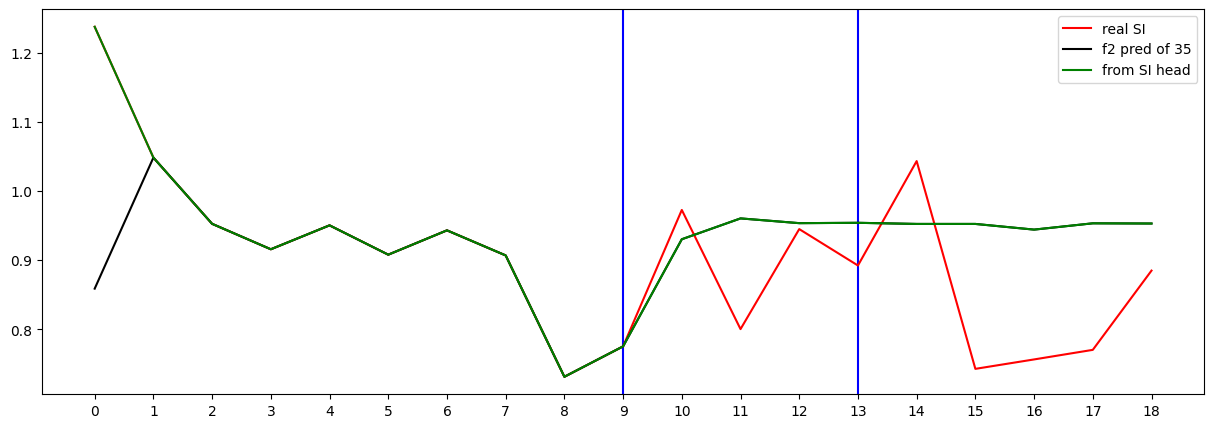

Testing R**2 - (all) - (no inputs):  0.9950648956476251
Testing R**2 - (f2) - SI full (no inputs):  -0.08753241984553273
Testing R**2 - SI head only (no inputs):  -0.08753241984553273
0 ...index R**2 (no inputs):  -0.09313066157173644
1 ...index R**2 (no inputs):  0.0009096740973665307
2 ...index R**2 (no inputs):  -0.08753241984553273
3 ...index R**2 (no inputs):  -0.6873622833580504
4 ...index R**2 (no inputs):  -0.28231170065437383
5 ...index R**2 (no inputs):  -0.005001758281478308
6 ...index R**2 (no inputs):  -0.7559083400555235
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.7030856696616985
10 ...index R**2 (no inputs):  -0.5153771807504821
11 ...index R**2 (no inputs):  -2.219082304172338
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.3803038065265192
16 ...index R**2 (no inputs):  -0.15683730186189315
17 ...index R**2 (no inputs):  -0

In [43]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 1.169275
Loss_SI: 1.427739143371582 Loss_all: 1.238348126411438
===


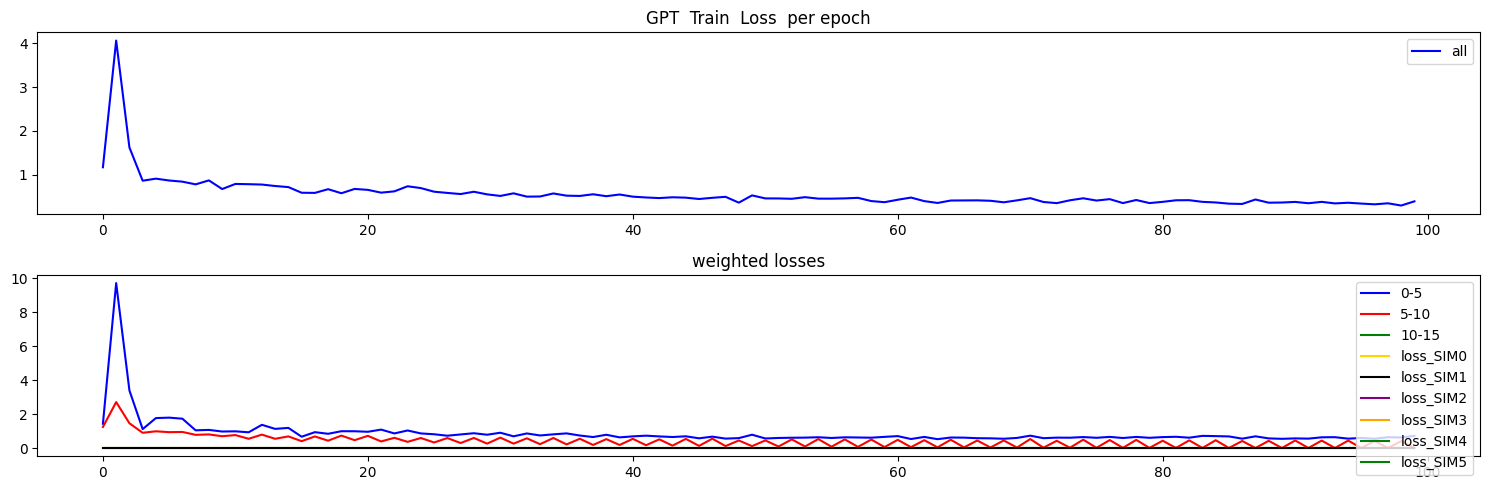

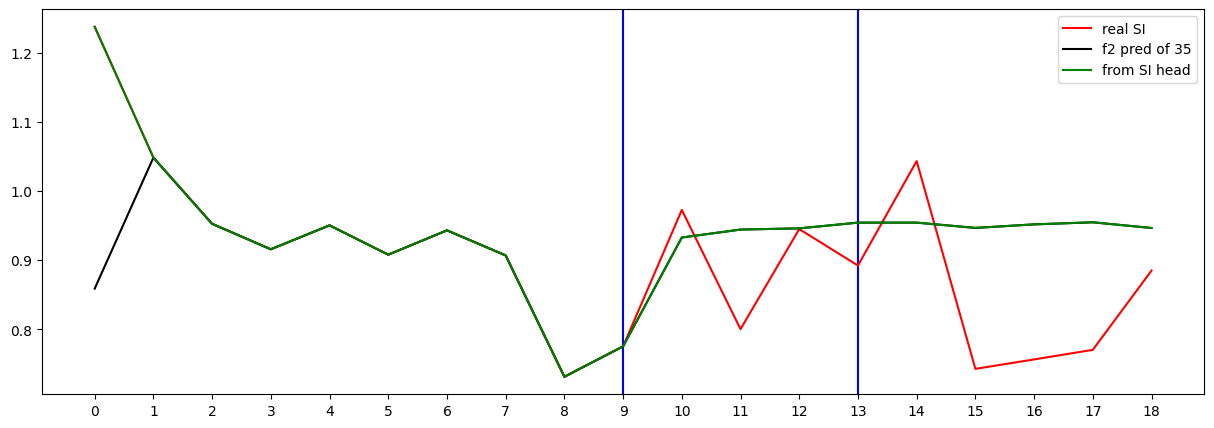

Testing R**2 - (all) - (no inputs):  0.9906085811017565
Testing R**2 - (f2) - SI full (no inputs):  -0.11007108215453609
Testing R**2 - SI head only (no inputs):  -0.11007108215453609
0 ...index R**2 (no inputs):  -0.05836349520197226
1 ...index R**2 (no inputs):  0.13473364365785556
2 ...index R**2 (no inputs):  -0.11007108215453609
3 ...index R**2 (no inputs):  -0.07934546897327532
4 ...index R**2 (no inputs):  -0.044686343645356175
5 ...index R**2 (no inputs):  -0.9089463679242649
6 ...index R**2 (no inputs):  -0.6524189114608181
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.2356991958147674
10 ...index R**2 (no inputs):  -0.5795649528262856
11 ...index R**2 (no inputs):  -9.198147329660465
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.17814305894793514
16 ...index R**2 (no inputs):  -0.15844089065705713
17 ...index R**2 (no inputs):  -10

In [44]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [45]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 1.734663
Loss_SI: 1.3968178033828735 Loss_all: 1.3774398565292358
===


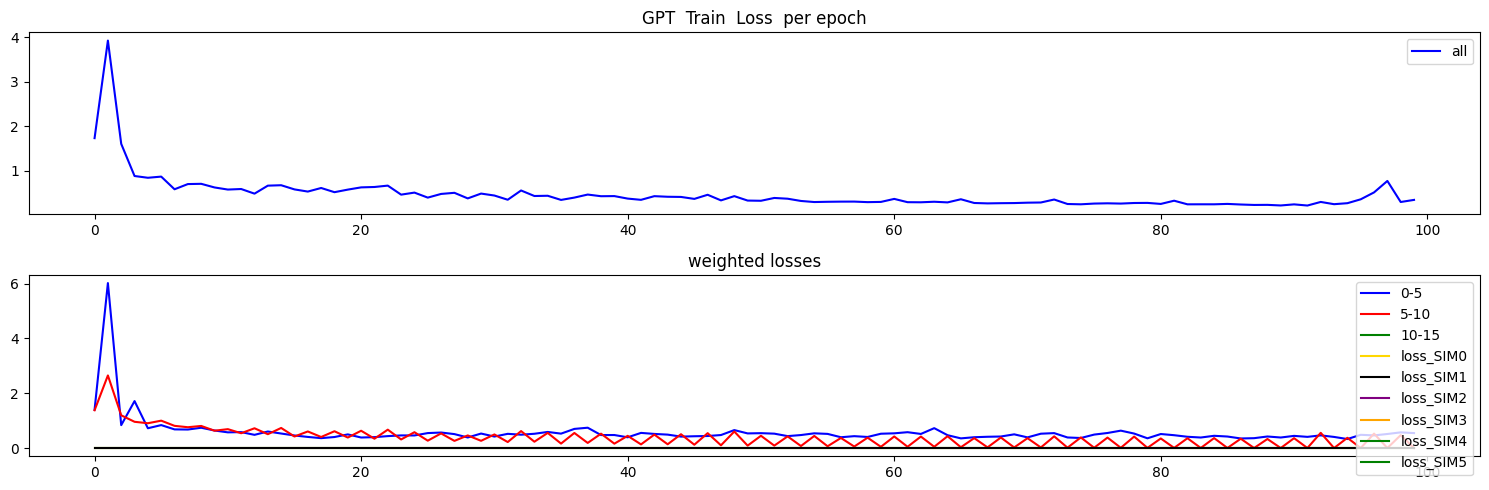

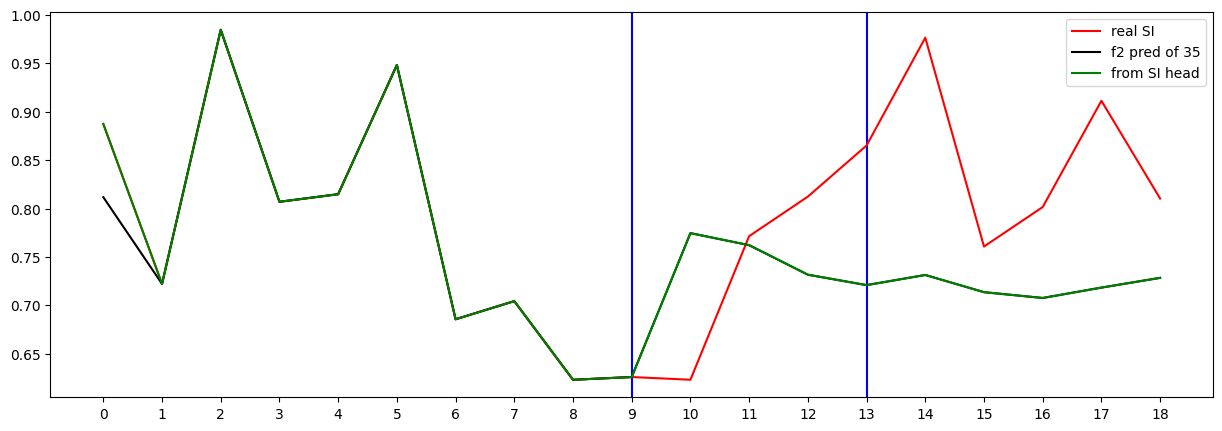

Testing R**2 - (all) - (no inputs):  0.995498410034049
Testing R**2 - (f2) - SI full (no inputs):  -3.1803433175072575
Testing R**2 - SI head only (no inputs):  -3.1803433175072575
0 ...index R**2 (no inputs):  -0.12445182147240086
1 ...index R**2 (no inputs):  -0.9948497677407677
2 ...index R**2 (no inputs):  -3.1803433175072575
3 ...index R**2 (no inputs):  -14.300510741580114
4 ...index R**2 (no inputs):  -0.003769754438325723
5 ...index R**2 (no inputs):  -531.2278294306772
6 ...index R**2 (no inputs):  -26.108164208035213
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.0966427682950779
10 ...index R**2 (no inputs):  -0.09573852988921328
11 ...index R**2 (no inputs):  -20.04149780380314
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.05696330293992058
16 ...index R**2 (no inputs):  -1.221317232100731
17 ...index R**2 (no inputs):  -120.3367

In [46]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.975627
Loss_SI: 1.5891536474227905 Loss_all: 1.1913950443267822
===


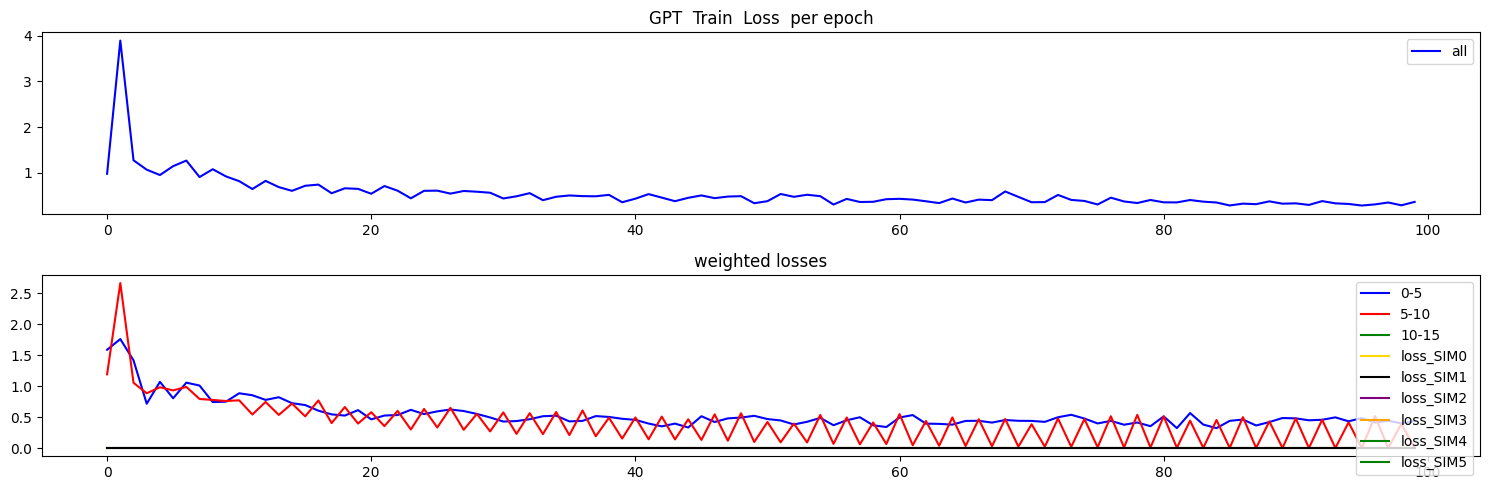

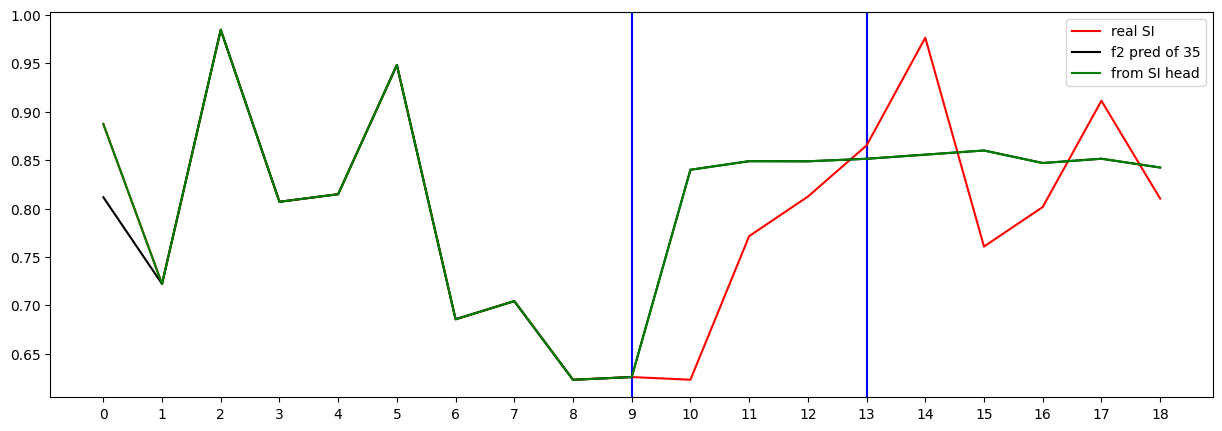

Testing R**2 - (all) - (no inputs):  0.9995550456036641
Testing R**2 - (f2) - SI full (no inputs):  -0.04174618881244507
Testing R**2 - SI head only (no inputs):  -0.04174618881244507
0 ...index R**2 (no inputs):  -0.14526380054788035
1 ...index R**2 (no inputs):  -12.120568917196147
2 ...index R**2 (no inputs):  -0.04174618881244507
3 ...index R**2 (no inputs):  -30.838621613708
4 ...index R**2 (no inputs):  -2.211768863349783
5 ...index R**2 (no inputs):  -46.58160721085735
6 ...index R**2 (no inputs):  -46.49163608829236
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.10404046946299528
10 ...index R**2 (no inputs):  0.11248755452303416
11 ...index R**2 (no inputs):  -104.99522233211177
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.9057821881905208
16 ...index R**2 (no inputs):  -0.1674135155987444
17 ...index R**2 (no inputs):  -122.088678

In [47]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.292124
Loss_SI: 1.4320459365844727 Loss_all: 1.2282930612564087
===


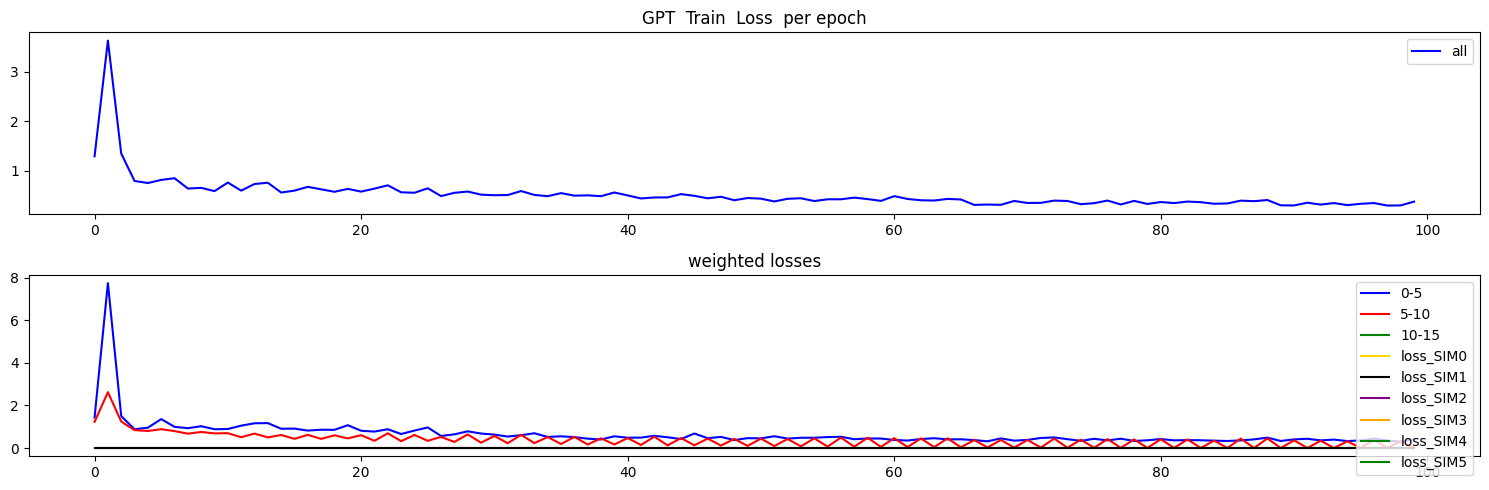

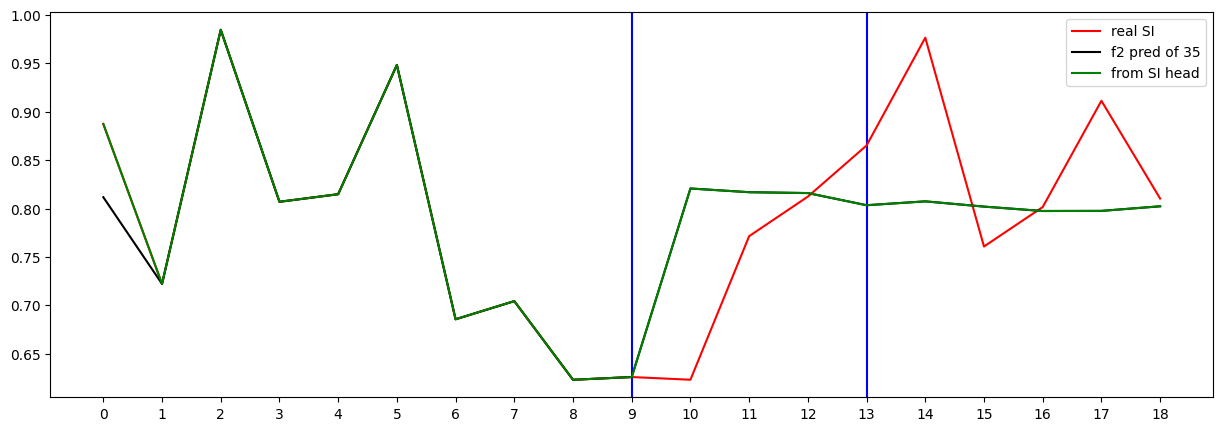

Testing R**2 - (all) - (no inputs):  0.9995814786157419
Testing R**2 - (f2) - SI full (no inputs):  -0.41448837325786836
Testing R**2 - SI head only (no inputs):  -0.41448837325786836
0 ...index R**2 (no inputs):  -0.5053036892550962
1 ...index R**2 (no inputs):  -15.96365455911334
2 ...index R**2 (no inputs):  -0.41448837325786836
3 ...index R**2 (no inputs):  -32.82520379525746
4 ...index R**2 (no inputs):  -5.845702028858273
5 ...index R**2 (no inputs):  -41.37357838076562
6 ...index R**2 (no inputs):  -27.86485484960662
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.050576852304422104
10 ...index R**2 (no inputs):  0.03932465970780186
11 ...index R**2 (no inputs):  -59.77823551070109
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.36038719899724025
16 ...index R**2 (no inputs):  -0.7237549075009151
17 ...index R**2 (no inputs):  -272.71634

In [48]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 1.341825
Loss_SI: 1.3644989728927612 Loss_all: 1.2796411514282227
===


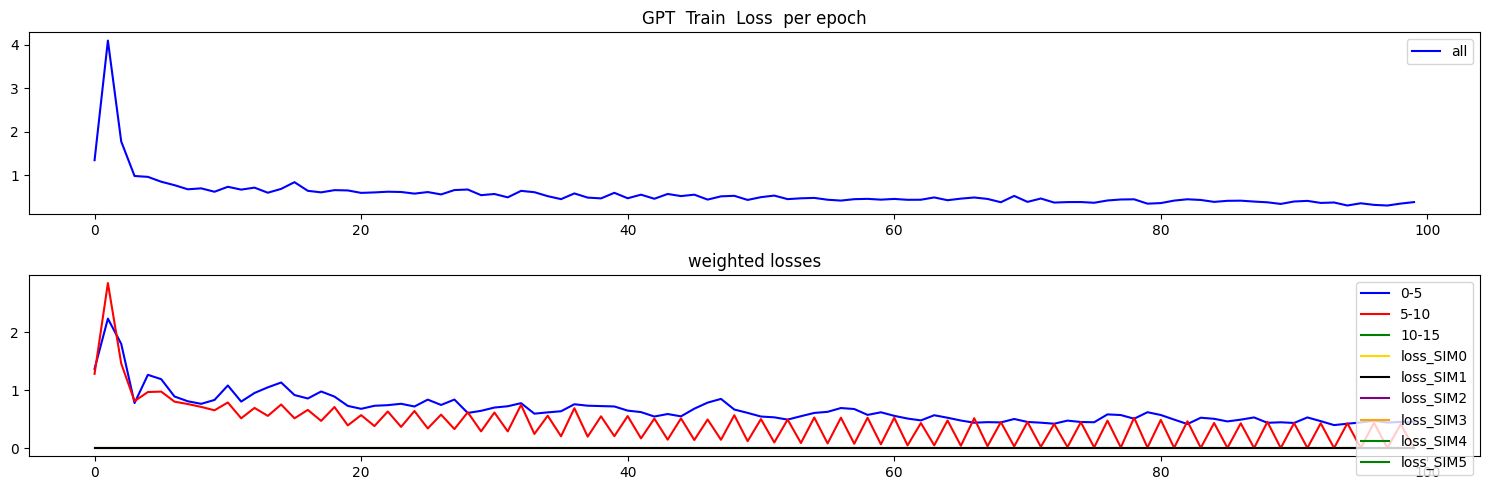

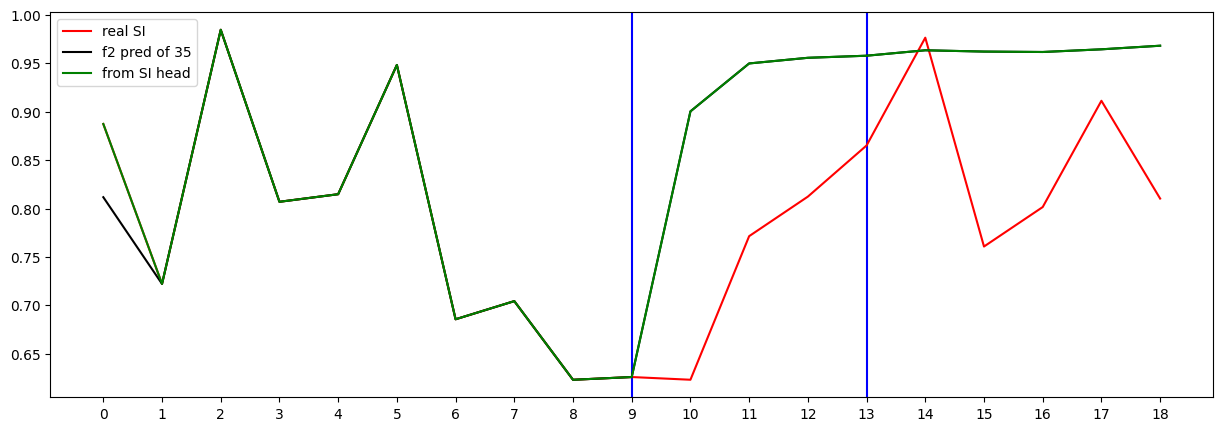

Testing R**2 - (all) - (no inputs):  0.9987683033527889
Testing R**2 - (f2) - SI full (no inputs):  -2.547299363524239
Testing R**2 - SI head only (no inputs):  -2.547299363524239
0 ...index R**2 (no inputs):  -0.08831484028176728
1 ...index R**2 (no inputs):  -5.774938262839187
2 ...index R**2 (no inputs):  -2.547299363524239
3 ...index R**2 (no inputs):  -33.24449855370209
4 ...index R**2 (no inputs):  -2.8579025855150006
5 ...index R**2 (no inputs):  -140.51432453645327
6 ...index R**2 (no inputs):  -251.31926898568994
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.016810620227306616
10 ...index R**2 (no inputs):  0.018737116209178395
11 ...index R**2 (no inputs):  -73.58309091403318
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.06930696221390154
16 ...index R**2 (no inputs):  -3.8752579726802345
17 ...index R**2 (no inputs):  -369.623325

In [49]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 6


In [50]:


chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()



[0] Train Loss: 1.083880
Loss_SI: 1.319926142692566 Loss_all: 1.166189432144165
===


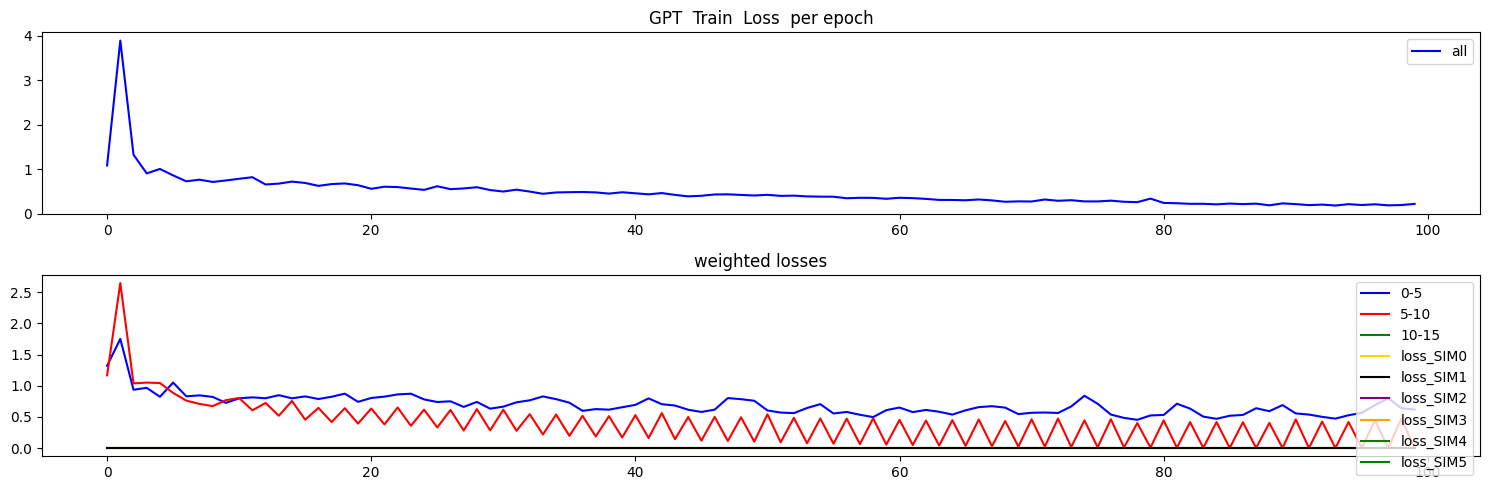

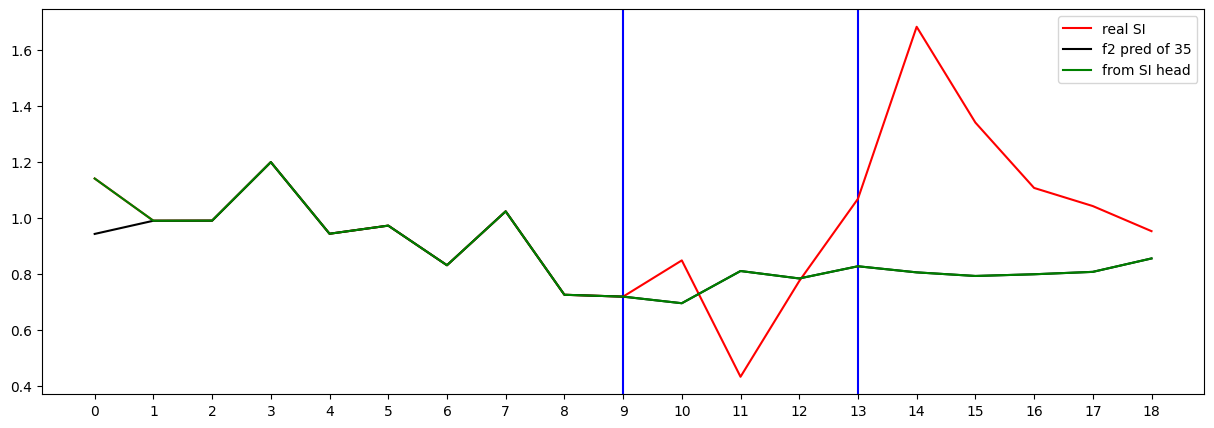

Testing R**2 - (all) - (no inputs):  0.9755344487121268
Testing R**2 - (f2) - SI full (no inputs):  -0.48607783792533255
Testing R**2 - SI head only (no inputs):  -0.48607783792533255
0 ...index R**2 (no inputs):  0.042209228937369336
1 ...index R**2 (no inputs):  -0.18692256167330967
2 ...index R**2 (no inputs):  -0.48607783792533255
3 ...index R**2 (no inputs):  -6.96907551278442
4 ...index R**2 (no inputs):  -0.5681584081047091
5 ...index R**2 (no inputs):  -0.1877357618261406
6 ...index R**2 (no inputs):  -0.6894445818411095
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.014400814459159528
10 ...index R**2 (no inputs):  0.06788991738481343
11 ...index R**2 (no inputs):  -3.3465094793328722
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.026687103805755008
16 ...index R**2 (no inputs):  -0.3258288136734131
17 ...index R**2 (no inputs):  -17.3

In [51]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )



[0] Train Loss: 1.202325
Loss_SI: 1.1350644826889038 Loss_all: 1.214490294456482
===


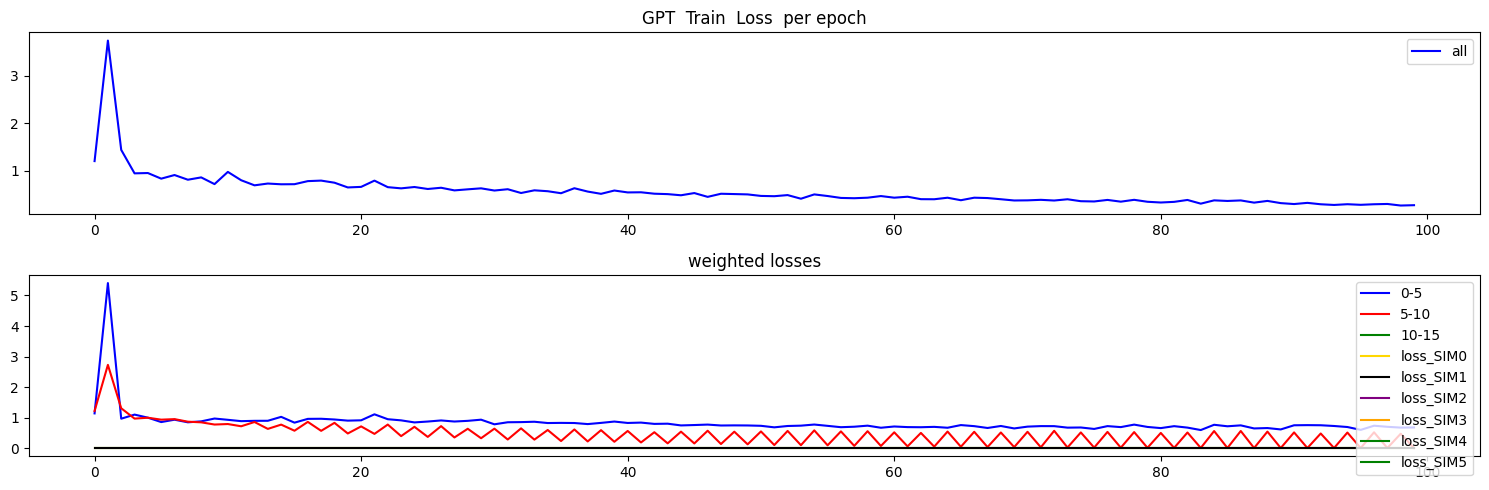

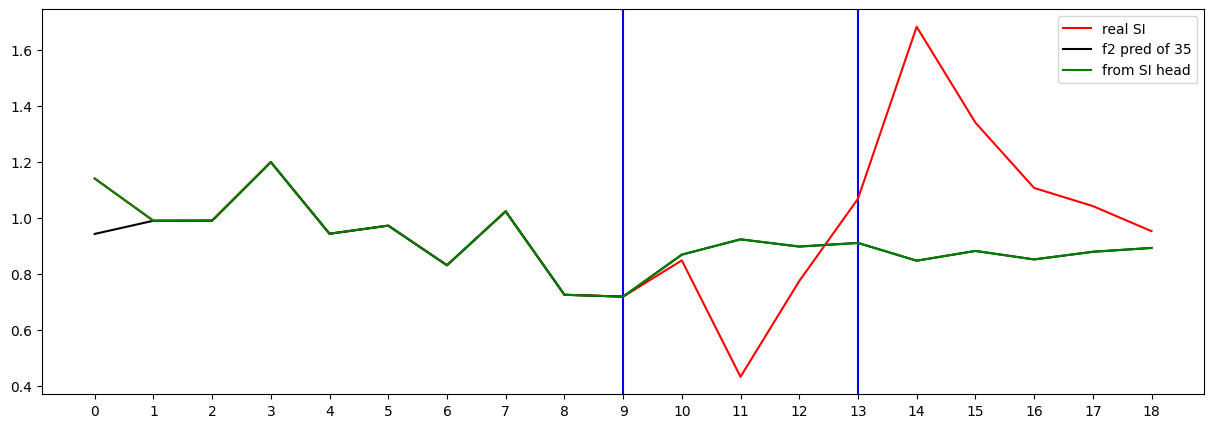

Testing R**2 - (all) - (no inputs):  0.9786330345153836
Testing R**2 - (f2) - SI full (no inputs):  -0.28331827278888966
Testing R**2 - SI head only (no inputs):  -0.28331827278888966
0 ...index R**2 (no inputs):  -0.11938352667012042
1 ...index R**2 (no inputs):  -0.5666103575474293
2 ...index R**2 (no inputs):  -0.28331827278888966
3 ...index R**2 (no inputs):  -10.295000796953737
4 ...index R**2 (no inputs):  -0.4152286291060141
5 ...index R**2 (no inputs):  -0.0363426038290422
6 ...index R**2 (no inputs):  -1.0177946477842243
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.22913882372469363
10 ...index R**2 (no inputs):  0.04779933772198497
11 ...index R**2 (no inputs):  -108.20900108077095
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.14606526208106585
16 ...index R**2 (no inputs):  -0.41900781282048927
17 ...index R**2 (no inputs):  -79

In [52]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.133276
Loss_SI: 1.0991075038909912 Loss_all: 1.1804473400115967
===


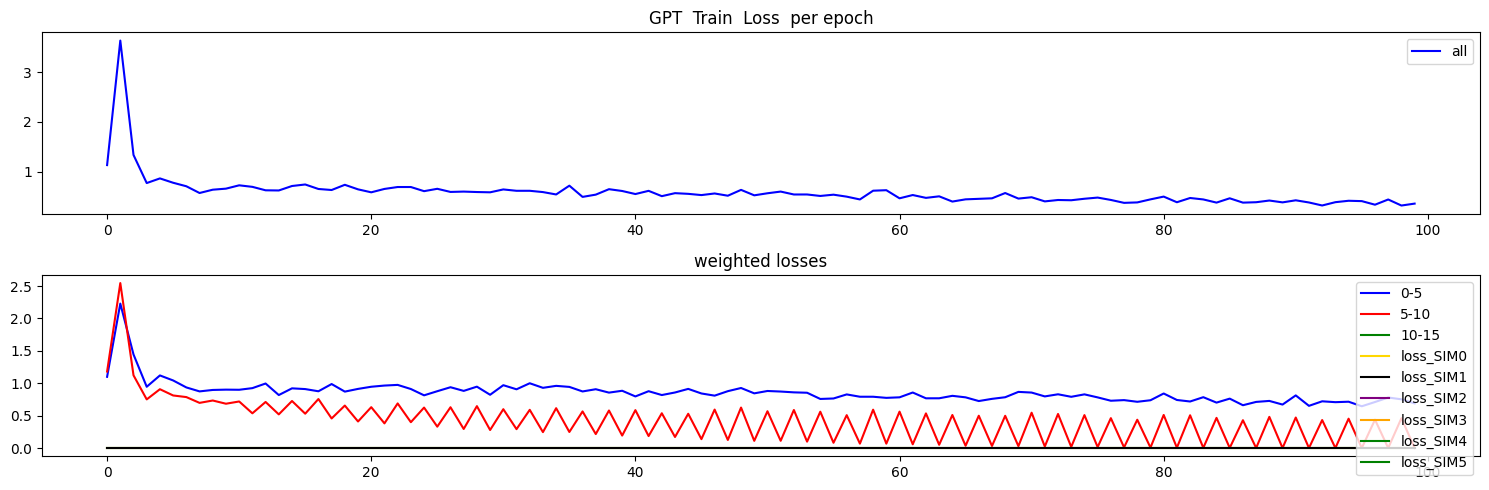

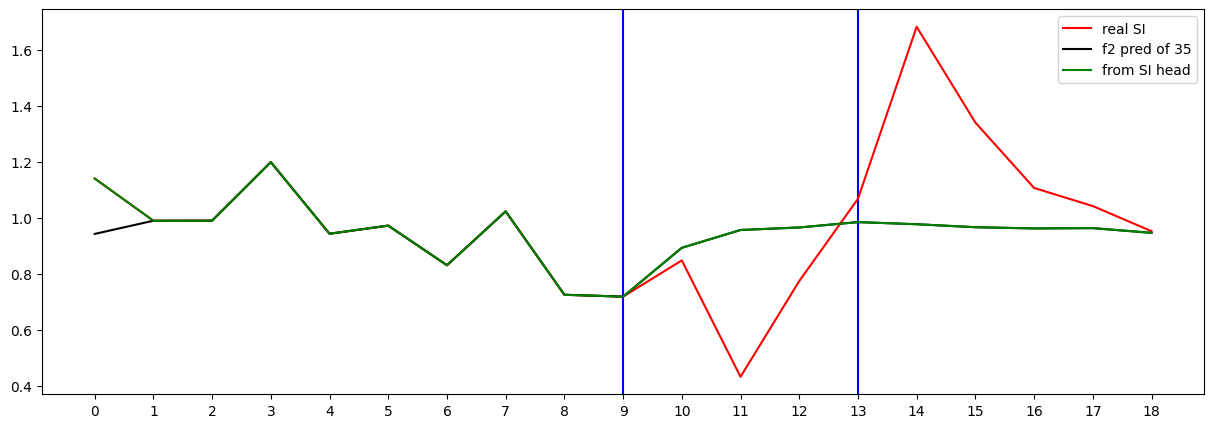

Testing R**2 - (all) - (no inputs):  0.9774063031554014
Testing R**2 - (f2) - SI full (no inputs):  0.024772207939200985
Testing R**2 - SI head only (no inputs):  0.024772207939200985
0 ...index R**2 (no inputs):  -0.04851785998027491
1 ...index R**2 (no inputs):  -0.05466118281604926
2 ...index R**2 (no inputs):  0.024772207939200985
3 ...index R**2 (no inputs):  -3.4069184653831677
4 ...index R**2 (no inputs):  -0.22228621844254182
5 ...index R**2 (no inputs):  -0.09410126643042194
6 ...index R**2 (no inputs):  -0.9287591527289787
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.12074203643421089
10 ...index R**2 (no inputs):  -0.015190060770916558
11 ...index R**2 (no inputs):  -457.172808971211
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.02234060295803275
16 ...index R**2 (no inputs):  0.04523309995733105
17 ...index R**2 (no inputs):  -4

In [53]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )



[0] Train Loss: 1.304591
Loss_SI: 1.1870733499526978 Loss_all: 1.2498297691345215
===


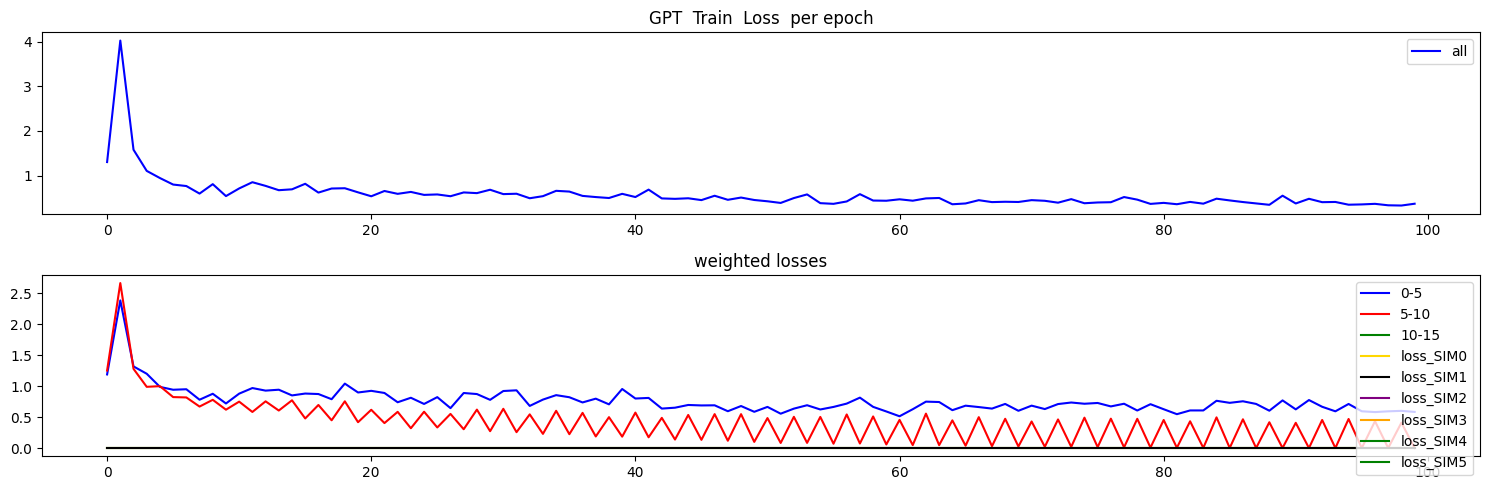

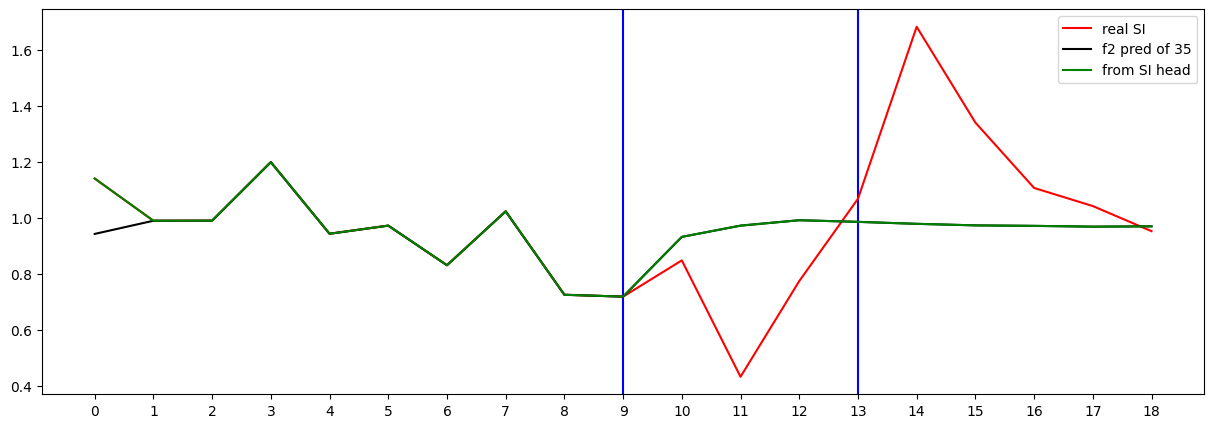

Testing R**2 - (all) - (no inputs):  0.9822325775191618
Testing R**2 - (f2) - SI full (no inputs):  -0.001124654849987472
Testing R**2 - SI head only (no inputs):  -0.001124654849987472
0 ...index R**2 (no inputs):  -0.08584411339622489
1 ...index R**2 (no inputs):  -0.11937686274921244
2 ...index R**2 (no inputs):  -0.001124654849987472
3 ...index R**2 (no inputs):  -5.997669007575049
4 ...index R**2 (no inputs):  -0.33623887881283565
5 ...index R**2 (no inputs):  0.13946521978946225
6 ...index R**2 (no inputs):  -0.9685409206048203
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.28930454769143554
10 ...index R**2 (no inputs):  -0.02727426368416963
11 ...index R**2 (no inputs):  -196.81163381467834
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.1482219258236397
16 ...index R**2 (no inputs):  0.05123785914987322
17 ...index R**2 (no inputs):  

In [54]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [55]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [56]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


Accumulated R² 300to400: -0.3787214680511657


In [57]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


Accumulated R² 200to400: -0.22465067022183982


In [58]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


Accumulated R² 100to400: 0.13994862532670205


In [59]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)


Accumulated R² 000to400: -0.0178611848389143



## First Few R2


In [60]:

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def time_series_metrics(y_true, y_pred):
    """
    y_true: numpy array of shape (N,)
    y_pred: numpy array of shape (N,)
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()

    # Ensure proper alignment
    assert y_true.shape == y_pred.shape, "Mismatched shapes"

    # Naive forecast (lag-1)
    y_naive = np.roll(y_true, 1)
    y_naive[0] = y_true[0]

    # Errors
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)

    # Naive R²
    ss_res = np.sum((y_true - y_pred)**2)
    ss_naive = np.sum((y_true - y_naive)**2)
    naive_r2 = 1 - ss_res / ss_naive

    # MASE (mean absolute scaled error)
    mae_naive = np.mean(np.abs(y_true[1:] - y_true[:-1])) + 1e-8  # avoid div-by-zero
    mase = np.mean(np.abs(y_true - y_pred)) / mae_naive

    metrics = {
        "RMSE": rmse,
        "MAE": mae,
        "Naive_R2": naive_r2,
        "MASE": mase
    }

    print(f"Naive_R2:....................................R²: {naive_r2:.4f}")
    print(f"RMSE:{rmse:.4f},MAE:{mae:.4f},MASE:{mase:.4f}")
    
    ## for k, v in metrics.items():
    ##     print(f"{k}: {v:.4f}")
    




In [61]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    start =  THE_FIRST_FEW - 1
    for i in range( start, len(real), 9 ):
        real_first4.append(real[i])
        pred_first4.append(pred[i])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".......................R² on just step n - R²:", r2_first4)
    
    time_series_metrics(real_first4, pred_first4)


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....................R² on first n steps - R²:", r2_first4)
    
    
    time_series_metrics(real_first4, pred_first4)
    
    print_first_few_R2_individual( real_si_concat, pred_si_concat, THE_FIRST_FEW )
    
    print('===================================================================')
    

    


In [62]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


1 .....................R² on first n steps - R²: -0.004606320959786414
Naive_R2:....................................R²: 0.4395
RMSE:0.1732,MAE:0.1401,MASE:0.6446
1 .......................R² on just step n - R²: -0.004606320959786414
Naive_R2:....................................R²: 0.4395
RMSE:0.1732,MAE:0.1401,MASE:0.6446
2 .....................R² on first n steps - R²: -0.1308345925451566
Naive_R2:....................................R²: 0.4653
RMSE:0.1471,MAE:0.1183,MASE:0.6662
2 .......................R² on just step n - R²: -1.7769000836175257
Naive_R2:....................................R²: -1.3515
RMSE:0.1151,MAE:0.0965,MASE:1.2707
3 .....................R² on first n steps - R²: -0.0023554082370100815
Naive_R2:....................................R²: 0.4645
RMSE:0.1506,MAE:0.1260,MASE:0.7136
3 .......................R² on just step n - R²: -0.30765140365903987
Naive_R2:....................................R²: 0.2954
RMSE:0.1574,MAE:0.1413,MASE:0.8246
4 .....................R² on fi

In [63]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


1 .....................R² on first n steps - R²: -0.5817008092724427
Naive_R2:....................................R²: 0.1175
RMSE:0.2174,MAE:0.1753,MASE:0.8065
1 .......................R² on just step n - R²: -0.5817008092724427
Naive_R2:....................................R²: 0.1175
RMSE:0.2174,MAE:0.1753,MASE:0.8065
2 .....................R² on first n steps - R²: -0.4143035119892542
Naive_R2:....................................R²: 0.3312
RMSE:0.1645,MAE:0.1213,MASE:0.6831
2 .......................R² on just step n - R²: -0.43632599539587624
Naive_R2:....................................R²: -0.2163
RMSE:0.0828,MAE:0.0674,MASE:0.8871
3 .....................R² on first n steps - R²: -0.14311365852588254
Naive_R2:....................................R²: 0.3893
RMSE:0.1608,MAE:0.1238,MASE:0.7011
3 .......................R² on just step n - R²: -0.23956067523601443
Naive_R2:....................................R²: 0.3321
RMSE:0.1533,MAE:0.1287,MASE:0.7507
4 .....................R² on first n

In [64]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



1 .....................R² on first n steps - R²: -0.6649257004798452
Naive_R2:....................................R²: 0.0711
RMSE:0.2230,MAE:0.1810,MASE:0.8330
1 .......................R² on just step n - R²: -0.6649257004798452
Naive_R2:....................................R²: 0.0711
RMSE:0.2230,MAE:0.1810,MASE:0.8330
2 .....................R² on first n steps - R²: -0.489879663759045
Naive_R2:....................................R²: 0.2955
RMSE:0.1688,MAE:0.1205,MASE:0.6783
2 .......................R² on just step n - R²: -0.5211966748120622
Naive_R2:....................................R²: -0.2881
RMSE:0.0852,MAE:0.0599,MASE:0.7885
3 .....................R² on first n steps - R²: -0.13040072547363213
Naive_R2:....................................R²: 0.3961
RMSE:0.1599,MAE:0.1222,MASE:0.6921
3 .......................R² on just step n - R²: -0.041419258202682885
Naive_R2:....................................R²: 0.4389
RMSE:0.1405,MAE:0.1256,MASE:0.7332
4 .....................R² on first n 

In [65]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )


1 .....................R² on first n steps - R²: -1.0764098418411328
Naive_R2:....................................R²: -0.1585
RMSE:0.2491,MAE:0.2047,MASE:0.9421
1 .......................R² on just step n - R²: -1.0764098418411328
Naive_R2:....................................R²: -0.1585
RMSE:0.2491,MAE:0.2047,MASE:0.9421
2 .....................R² on first n steps - R²: -1.0277240350469663
Naive_R2:....................................R²: 0.0411
RMSE:0.1969,MAE:0.1546,MASE:0.8704
2 .......................R² on just step n - R²: -2.257225579500472
Naive_R2:....................................R²: -1.7582
RMSE:0.1247,MAE:0.1044,MASE:1.3745
3 .....................R² on first n steps - R²: -0.4084563677078936
Naive_R2:....................................R²: 0.2475
RMSE:0.1785,MAE:0.1436,MASE:0.8137
3 .......................R² on just step n - R²: 0.048417480705162275
Naive_R2:....................................R²: 0.4873
RMSE:0.1343,MAE:0.1218,MASE:0.7108
4 .....................R² on first n 


## Plot


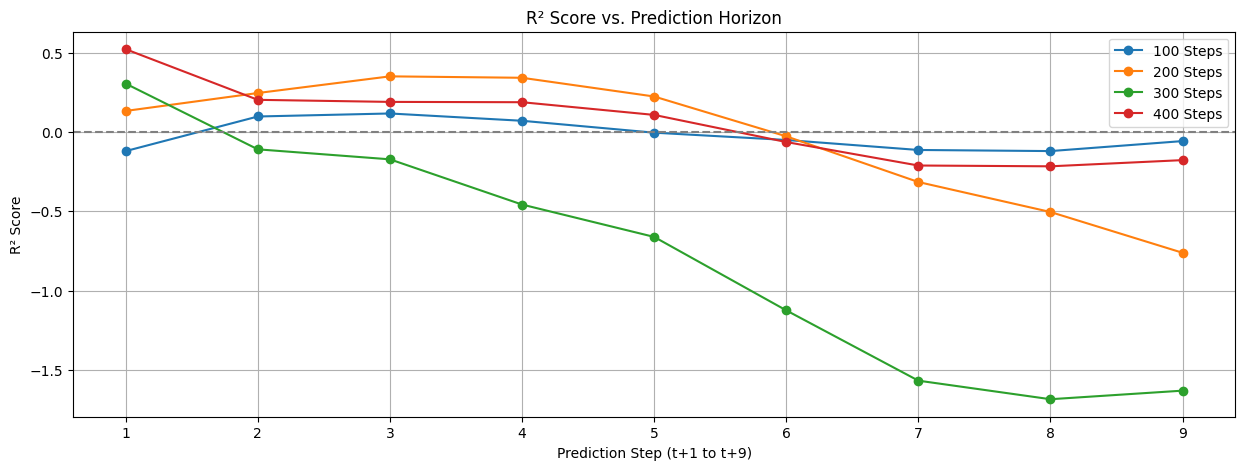

In [66]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
